# AIFFEL_1st_Hackathon :: 8조(JYK)
---

## 데이터 살펴보기
---

### 데이터 불러오기

In [1]:
import os
from os.path import join

import pandas as pd
import numpy as np
import missingno as msno

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%load_ext autotime

time: 246 µs (started: 2021-02-10 14:55:45 +09:00)


In [2]:
import tensorflow as tf

def init_gpu():
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
      try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
          tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
      except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
        
init_gpu()

1 Physical GPUs, 1 Logical GPUs
time: 1.35 s (started: 2021-02-10 14:55:46 +09:00)


In [3]:
!pwd

/home/aiffel-dj1/workspace/aiffel-exploration-workspace/E10_kaggle/AIFFEL_1st_Hackathon/2.code
time: 115 ms (started: 2021-02-10 14:55:47 +09:00)


In [4]:
# workspace_dir을 pwd에서 확인한 본인의 주소로 바꿔주세요
workspace_dir = os.getenv('HOME') + '/workspace/aiffel-exploration-workspace/E10_kaggle/AIFFEL_1st_Hackathon'

time: 609 µs (started: 2021-02-10 14:55:49 +09:00)


In [5]:
data_dir = workspace_dir + '/1.data'
code_dir = workspace_dir + '/2.code'
submission_dir = workspace_dir + '/3.submission'

train_data_path = join(data_dir, 'sales_train.csv')
test_data_path = join(data_dir, 'test.csv')
sample_submission_data_path = join(data_dir,'sample_submission.csv')
item_categories_data_path = join(data_dir, 'item_categories.csv')
items_data_path = join(data_dir, 'items.csv')
shops_data_path = join(data_dir, 'shops.csv')

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)
sample_submission = pd.read_csv(sample_submission_data_path)
item_categories = pd.read_csv(item_categories_data_path)
items = pd.read_csv(items_data_path)
shops = pd.read_csv(shops_data_path)

item_categories_with_eng_name_data_path = join(data_dir, 'item_category_with_eng_name.csv')
item_categories_eng = pd.read_csv(item_categories_with_eng_name_data_path)

print('train data dim : {}'.format(train.shape)) # 훈련 데이터 형태
print('test data dim : {}'.format(test.shape))    # 시험 데이터 형태
print('submission dim : {}'.format(sample_submission.shape)) # 제출 샘플 데이터 형태
print('item_categories data dim : {}'.format(item_categories.shape)) # 아이템 카데고리 데이터 형태
print('items data dim : {}'.format(items.shape)) # 아이템 데이터 형태
print('shops data dim : {}'.format(shops.shape)) # 상점 데이터 형태

train data dim : (2935849, 6)
test data dim : (214200, 3)
submission dim : (214200, 2)
item_categories data dim : (84, 2)
items data dim : (22170, 3)
shops data dim : (60, 2)
time: 1.08 s (started: 2021-02-10 14:55:49 +09:00)


### 데이터 살펴보기
데이터 의존도가 낮은 순으로 탐색

#### item_categories
- item_categories.csv의 데이터 프레임
- name of item category

In [6]:
item_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB
time: 8.71 ms (started: 2021-02-10 14:55:53 +09:00)


In [7]:
item_categories.tail(10)

,item_category_name,item_category_id
74,Программы - MAC (Цифра),74
75,Программы - Для дома и офиса,75
76,Программы - Для дома и офиса (Цифра),76
77,Программы - Обучающие,77
78,Программы - Обучающие (Цифра),78
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82
83,Элементы питания,83


time: 12.6 ms (started: 2021-02-10 14:55:53 +09:00)


- 러시아어로는 데이터를 이해하는 것에 어려움인 있어 item_category_name을 영어로 번역한 item_category_name_eng column을 가지는 문서 파일을 불러와 `item_categories_eng`로 저장하였다.

In [8]:
item_categories_with_eng_name_data_path = join(data_dir, 'item_category_with_eng_name.csv')
item_categories_eng = pd.read_csv(item_categories_with_eng_name_data_path)

time: 2.54 ms (started: 2021-02-10 14:55:54 +09:00)


In [9]:
item_categories_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   item_category_id        84 non-null     int64 
 1   item_category_name      84 non-null     object
 2   item_category_name_eng  84 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.1+ KB
time: 3.62 ms (started: 2021-02-10 14:55:54 +09:00)


In [10]:
item_categories_eng.tail(10)

,item_category_id,item_category_name,item_category_name_eng
74,74,Программы - MAC (Цифра),Programs - MAC (Digital)
75,75,Программы - Для дома и офиса,Programs - For Home and Office
76,76,Программы - Для дома и офиса (Цифра),Programs - For Home and Office (Digital)
77,77,Программы - Обучающие,Programs - Educational
78,78,Программы - Обучающие (Цифра),Programs - Educational (Digital)
79,79,Служебные,Service
80,80,Служебные - Билеты,Service - Tickets
81,81,Чистые носители (шпиль),Blank media (spire)
82,82,Чистые носители (штучные),Blank media (piece)
83,83,Элементы питания,Batteries


time: 6.46 ms (started: 2021-02-10 14:55:54 +09:00)


- 결측치 확인

In [11]:
np.sum(pd.isnull(item_categories_eng))

item_category_id          0
item_category_name        0
item_category_name_eng    0
dtype: int64

time: 3.03 ms (started: 2021-02-10 14:55:54 +09:00)


- `get_item_category_name(id, lang="ru")`

In [12]:
def get_item_category_name(id, lang="ru"):
    item = item_categories_eng[item_categories_eng['item_category_id'] == id].reset_index(drop=True)
    if len(item) <= 0 : print(f'[get_item_category_name] Invalid id {id}')
    elif lang == "ru": return item.loc[0]['item_category_name']
    elif lang == "eng": return item.loc[0]['item_category_name_eng']

time: 712 µs (started: 2021-02-10 14:55:55 +09:00)


In [13]:
get_item_category_name(83), get_item_category_name(83, 'eng'), get_item_category_name(84)

[get_item_category_name] Invalid id 84


('Элементы питания', 'Batteries', None)

time: 5.18 ms (started: 2021-02-10 14:55:55 +09:00)


#### items
- items.csv의 데이터 프레임
- 판매 품목의 id, name, category(FK, item_categories.item_category_id)에 관한 정보를 가지고 있다.

In [14]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB
time: 4.77 ms (started: 2021-02-10 14:55:56 +09:00)


In [15]:
items.tail(10)

,item_name,item_id,item_category_id
22160,ЯРМАРКА ТЩЕСЛАВИЯ (Регион),22160,40
22161,ЯРОСЛАВ. ТЫСЯЧУ ЛЕТ НАЗАД э (BD),22161,37
22162,ЯРОСТЬ,22162,40
22163,ЯРОСТЬ ( регион),22163,40
22164,ЯРОСТЬ (BD),22164,37
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62
22169,Яйцо дракона (Игра престолов),22169,69


time: 5.61 ms (started: 2021-02-10 14:55:56 +09:00)


- 결측치 확인

In [16]:
np.sum(pd.isnull(items))

item_name           0
item_id             0
item_category_id    0
dtype: int64

time: 3.86 ms (started: 2021-02-10 14:55:57 +09:00)


- `get_item_name(id)`

In [17]:
def get_item_name(id, lang="ru"):
    item = items[items['item_id'] == id].reset_index(drop=True)
    return item.loc[0]['item_name'] if len(item) > 0 else print(f'[get_item_name] Invalid id {id}')

time: 700 µs (started: 2021-02-10 14:55:57 +09:00)


- `get_item_category_id(id)`

In [18]:
def get_item_category_id(id):
    item = items[items['item_id'] == id].reset_index(drop=True)
    return item.loc[0]['item_category_id'] if len(item) > 0 else print(f'[get_item_name] Invalid id {id}')

time: 512 µs (started: 2021-02-10 14:55:57 +09:00)


In [19]:
get_item_name(22169), get_item_name(22170)

[get_item_name] Invalid id 22170


('Яйцо дракона (Игра престолов)', None)

time: 5.45 ms (started: 2021-02-10 14:55:58 +09:00)


#### shops
- shops.csv의 데이터 프레임
- 가게의 id, name에 관한 정보를 가지고 있다.

In [20]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
time: 5.08 ms (started: 2021-02-10 14:55:59 +09:00)


In [21]:
shops.tail(10)

,shop_name,shop_id
50,"Тюмень ТЦ ""Гудвин""",50
51,"Тюмень ТЦ ""Зеленый Берег""",51
52,"Уфа ТК ""Центральный""",52
53,"Уфа ТЦ ""Семья"" 2",53
54,"Химки ТЦ ""Мега""",54
55,Цифровой склад 1С-Онлайн,55
56,"Чехов ТРЦ ""Карнавал""",56
57,"Якутск Орджоникидзе, 56",57
58,"Якутск ТЦ ""Центральный""",58
59,"Ярославль ТЦ ""Альтаир""",59


time: 5.63 ms (started: 2021-02-10 14:55:59 +09:00)


- 결측치 확인

In [22]:
np.sum(pd.isnull(shops))

shop_name    0
shop_id      0
dtype: int64

time: 3.33 ms (started: 2021-02-10 14:56:00 +09:00)


#### train

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
time: 3 ms (started: 2021-02-10 14:56:00 +09:00)


In [24]:
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


time: 10.7 ms (started: 2021-02-10 14:56:00 +09:00)


- date가 '일/월/년' 순이기 때문에 sort를 하거나 할 때 불편한 사항이 있다. date의 format을 '년월일'로 변경한다.

In [25]:
def change_date(date):
    splited = date.split('.')
    return f'{splited[2]}{splited[1]}{splited[0]}'
train['date'] = train['date'].apply(change_date).astype(str)

time: 1.64 s (started: 2021-02-10 14:56:01 +09:00)


In [26]:
# mean 하지 말것, 터짐
train.agg(['count','min','max'])

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2935849,2935849,2935849,2935849,2935849.0,2935849.0
min,20130101,0,0,0,-1.0,-22.0
max,20151031,33,59,22169,307980.0,2169.0


time: 726 ms (started: 2021-02-10 14:56:03 +09:00)


- 데이터 유효성 확인
    1. train.shop_id는 shop.shop_id에 존재해야 한다.
    2. train.item_id는 shop.item_id에 존재해야 한다.
    3. date와 date_block_num가 알맞게 매치되어야 한다.

In [27]:
# train.shop_id는 shop.shop_id에 존재해야 한다.
train_shop = train['shop_id'].unique()
shops_shop = shops['shop_id'].unique()

is_shop_exist = lambda x : x in shops_shop
validation_shop_id_res = np.array([ is_shop_exist(shop) for shop in train_shop ])
validation_shop_id_res.all()

True

time: 18.1 ms (started: 2021-02-10 14:56:03 +09:00)


In [28]:
# train.item_id는 shop.item_id에 존재해야 한다.
train_item = train['item_id'].unique()
items_item = items['item_id'].unique()

is_item_exist = lambda x : x in items_item
validation_item_id_res = np.array([ is_item_exist(item) for item in train_item ])
validation_item_id_res.all()

True

time: 328 ms (started: 2021-02-10 14:56:03 +09:00)


In [29]:
# date와 date_block_num가 알맞게 매치되어야 한다.
year = ['2013', '2014', '2015']
month = ['01','02','03','04','05','06','07','08','09','10','11','12']
date_block_list = [ f'{y}{m}' for y in year for m in month ]
date_block_num_dict = { n : i for i, n in enumerate(date_block_list)}
date_block_num_dict

{'201301': 0,
 '201302': 1,
 '201303': 2,
 '201304': 3,
 '201305': 4,
 '201306': 5,
 '201307': 6,
 '201308': 7,
 '201309': 8,
 '201310': 9,
 '201311': 10,
 '201312': 11,
 '201401': 12,
 '201402': 13,
 '201403': 14,
 '201404': 15,
 '201405': 16,
 '201406': 17,
 '201407': 18,
 '201408': 19,
 '201409': 20,
 '201410': 21,
 '201411': 22,
 '201412': 23,
 '201501': 24,
 '201502': 25,
 '201503': 26,
 '201504': 27,
 '201505': 28,
 '201506': 29,
 '201507': 30,
 '201508': 31,
 '201509': 32,
 '201510': 33,
 '201511': 34,
 '201512': 35}

time: 2.76 ms (started: 2021-02-10 14:56:04 +09:00)


In [30]:
train_date = train.loc[:, 'date':'date_block_num'].values
is_correct_block_num = lambda d, dn: True if date_block_num_dict[d] == dn else False
res = np.array([ is_correct_block_num(d[:6], dn) for d, dn in train_date ])
res.all()

True

time: 3.39 s (started: 2021-02-10 14:56:04 +09:00)


- 확인 결과, train의 item_id, shop_id, date_block_num은 유효한 데이터이다.

#### test
- test.csv의 데이터 프레임
- 테스트에 사용될 데이터로, ID, shop_id, item_id를 column으로 가지고 있다.

In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB
time: 4.91 ms (started: 2021-02-10 14:56:07 +09:00)


#### sample_submission
- sample_submission.csv의 데이터 프레임
- 테스트 결과를 저장할 csv의 파일을 옳바른 포맷을 정의하고 있다.
- ID는 test.ID와 같은 값을 가진다.
- item_cnt_month는 train date 이후 한달(2015/11)간 특정 가게(shop_id)에서 특정 아이템(item_id)가 얼마나 판매될지를 예측한 값이다.

In [32]:
sample_submission.tail()

,ID,item_cnt_month
214195,214195,0.5
214196,214196,0.5
214197,214197,0.5
214198,214198,0.5
214199,214199,0.5


time: 6.93 ms (started: 2021-02-10 14:56:07 +09:00)


### 이상치 탐색

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

time: 482 µs (started: 2021-02-10 14:56:07 +09:00)


#### train.item_price

In [34]:
price_mean = train['item_price'].mean()
price_max = train['item_price'].max() + 100
price_min = train['item_price'].min() - 100

time: 39.2 ms (started: 2021-02-10 14:56:07 +09:00)


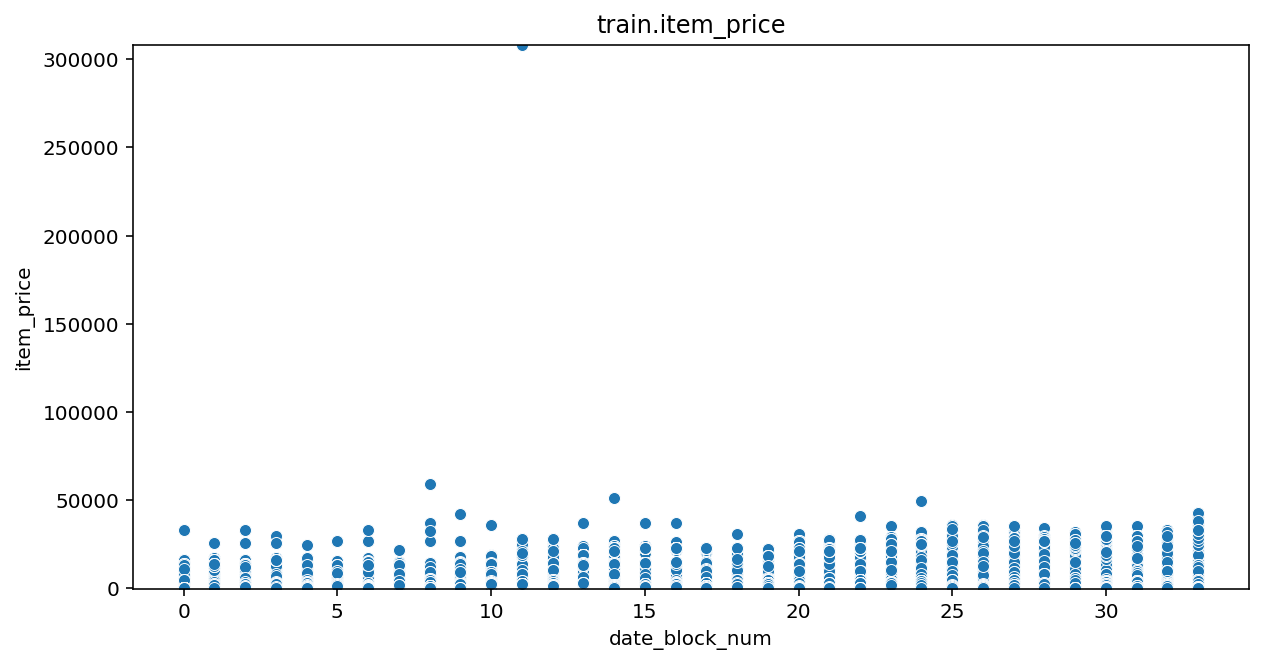

time: 7.72 s (started: 2021-02-10 14:56:07 +09:00)


In [35]:
fig, ax1 = plt.subplots(1, figsize=(10,5))
sns.scatterplot(data=train , x='date_block_num', y='item_price', palette="ch:r=-.2,d=.3_r", ax=ax1)
ax1.set_title('train.item_price')
ax1.set_ylim(top=price_max, bottom=price_min)
plt.show()

- 그래프상에서 너무 큰 값이 발견 되었다. 이 값에 대해 자세히 알아보자.

In [36]:
train[train['item_price'] > 100000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,20131213,11,12,6066,307980.0,1.0


time: 8.68 ms (started: 2021-02-10 14:56:15 +09:00)


In [37]:
print(f'item name : {get_item_name(6066)}')
print(f'item catetgory : {get_item_category_name(get_item_category_id(6066), "eng")}')

item name : Radmin 3  - 522 лиц.
item catetgory : Programs - For Home and Office
time: 4.53 ms (started: 2021-02-10 14:56:15 +09:00)


- 발견된 데이터가 이상치인지 특이치인지 확인하기 위하여 제품의 정보를 인터넷상으로 찾아 보았다.
- 데이터 제공자인 1C의 제품 판매 홈페이지(https://online.1c.ru/)에서 아래와 같은 제품을 확인할 수 있었다. 
![note_01_price_outlier](https://user-images.githubusercontent.com/16831323/107468811-08232500-6bac-11eb-8fa8-9d5bbe059bcf.png)


- 해당 데이터는 Radmin이라는 운영체제로 인터넷상에서는 최대 25개의 라이센스를 묶음으로 판매하고 있다. item_name 정보를 기반으로 추리하면, 문제의 데이터 ***Radmin 3  - 522 лиц.***은 Radmin 라이센스 522개를 묶음으로 판매한 것으로 생각할 수 있다. 관공서나 기업에서 단체구매를 했다고 생각할 수 있을 것이다.
- 하지만 금액적으로 살펴 보았을 때, 한개의 라이센스의 가격이 1250이기 때문에 522개를 판매했다는 가정이 맞을려면 652500(1250\*522)가 되어야하는데, 데이터상의 값은 307980보다 월등히 높은 값을 보인다. 실생활을 생각해 보면 대량구매를 할 때, 할인을 받는 경우가 왕왕있다. 이점을 고려하면 652500 * 0.472 = 307980이므로 52.8%를 할인 받았다고 볼 수 있다.
- 충분히 나올 수 있는 수치이기는하나 522개의 운영체제를 한번에 사는 것은 흔하지 않은 이벤트 이기 때문에 이상치로 분류하여 제거하는 곳이 옳아 보인다.

In [38]:
train[train['item_price'] < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,20130515,4,32,2973,-1.0,1.0


time: 11.6 ms (started: 2021-02-10 14:56:15 +09:00)


- 아이템의 가격이 음수인 경우가 있었다. 잘못 입력된 데이터로 생각하여 삭제하기로 한다.

 #### train.item_cnt_day

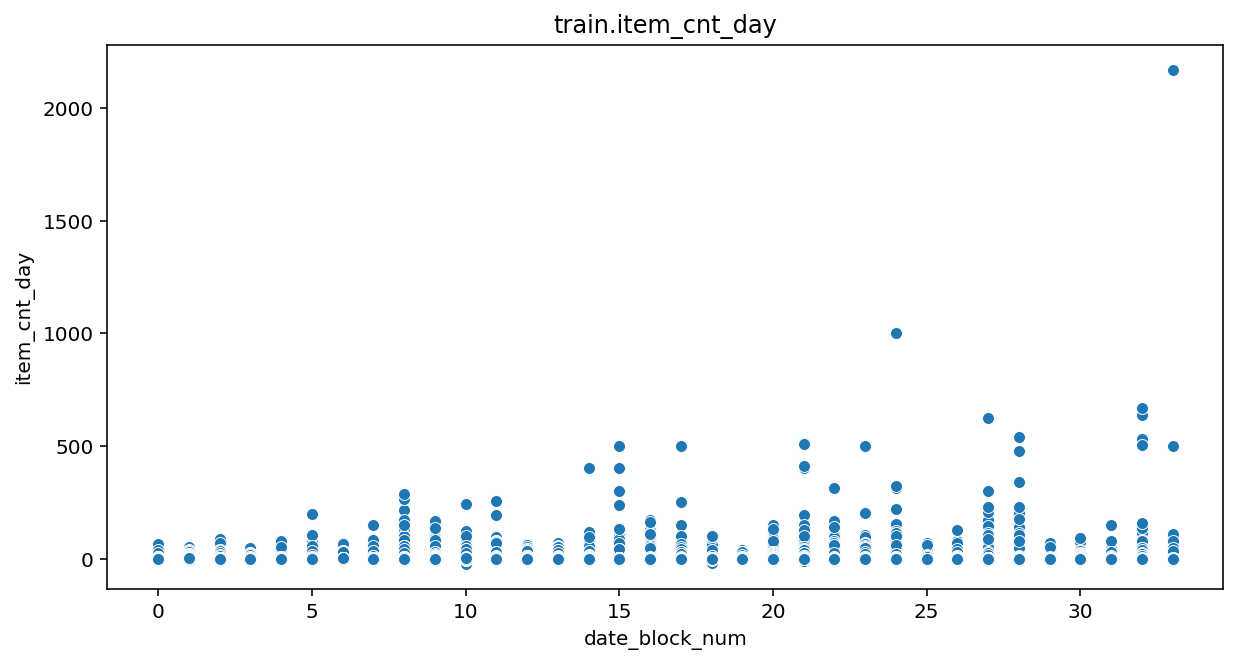

time: 9.11 s (started: 2021-02-10 14:56:15 +09:00)


In [39]:
fig, ax1 = plt.subplots(1, figsize=(10,5))
sns.scatterplot(data=train , x='date_block_num', y='item_cnt_day', ax=ax1)
ax1.set_title('train.item_cnt_day')
plt.show()

In [41]:
train[train['item_cnt_day'] > 800]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2326930,20150115,24,12,20949,4.000000,1000.0
2909818,20151028,33,12,11373,0.908714,2169.0


time: 9.64 ms (started: 2021-02-10 14:57:03 +09:00)


- 그래프의 모양을 통하여 너무 데이터가 2개 존재함을 알 수 있다.
- 너무 큰 데이터 1. ['item_id']==11373
    - 가격 동일 카테고리의 제품들에 비해 가격이 너무 저렴하고 판매량이 높으면 item_name `issue`라는 단어를 포함하고 있다.배송이 이렇게 많다는거면 할인 이벤트라고 볼 수 있을 것 같다.
    - 일반적이지 않은 데이터이므로 삭제하도록 한다.
- 너무 큰 데이터 2.
    - 데이터의 양이 1000인데, 카테고리르 살펴보니 T셔츠였다.
    - 단체 주문 등 일반적으로 발생할 수 있는 문제이기 때문에 삭제하지 않는다.

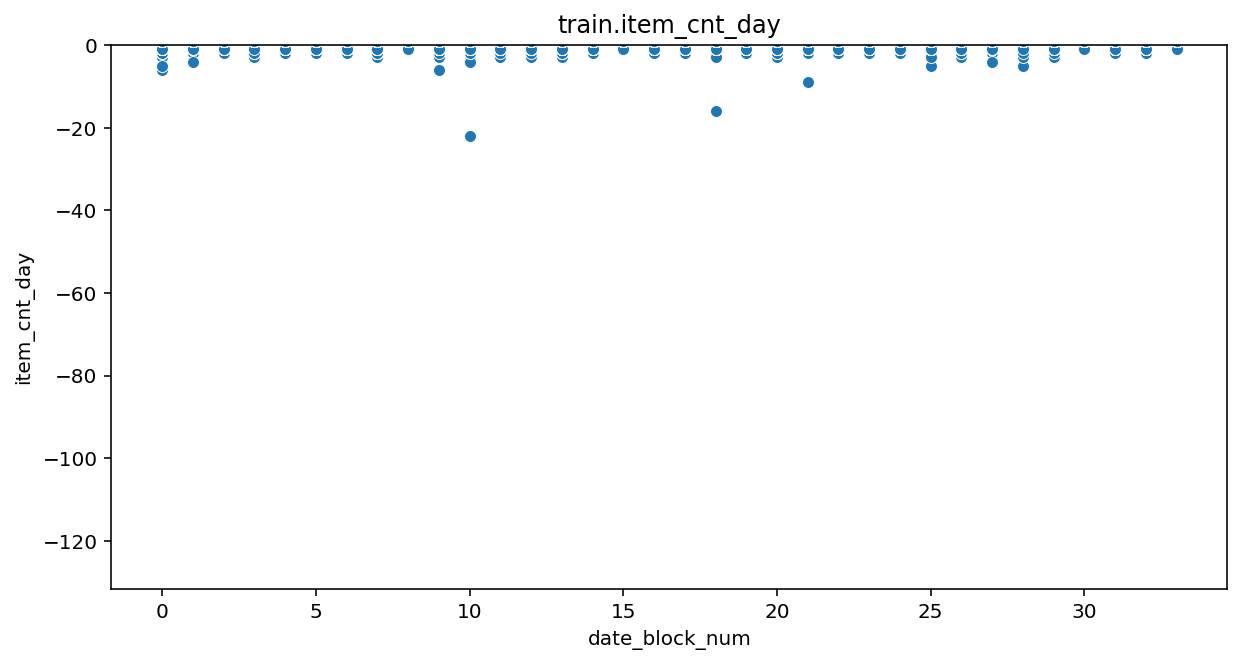

time: 6.03 s (started: 2021-02-10 14:56:24 +09:00)


In [40]:
fig, ax1 = plt.subplots(1, figsize=(10,5))
sns.scatterplot(data=train , x='date_block_num', y='item_cnt_day', ax=ax1)
ax1.set_ylim(top=0)
ax1.set_title('train.item_cnt_day')
plt.show()

- 반대로 너무 작은 데이터(음수)가 존재하였다. 이는 반품 된 상품으로 생각할 수 있으므로, 특이치라 판단하여 삭제하지 않는다.

## 전처리
---

### 결측치 탐색

#### train
- train 데이터의 결측치를 확인하고, 그에 대한 처리를 진행한다.

In [ ]:
np.sum(pd.isnull(train))

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

time: 127 ms (started: 2021-02-10 01:07:18 +09:00)


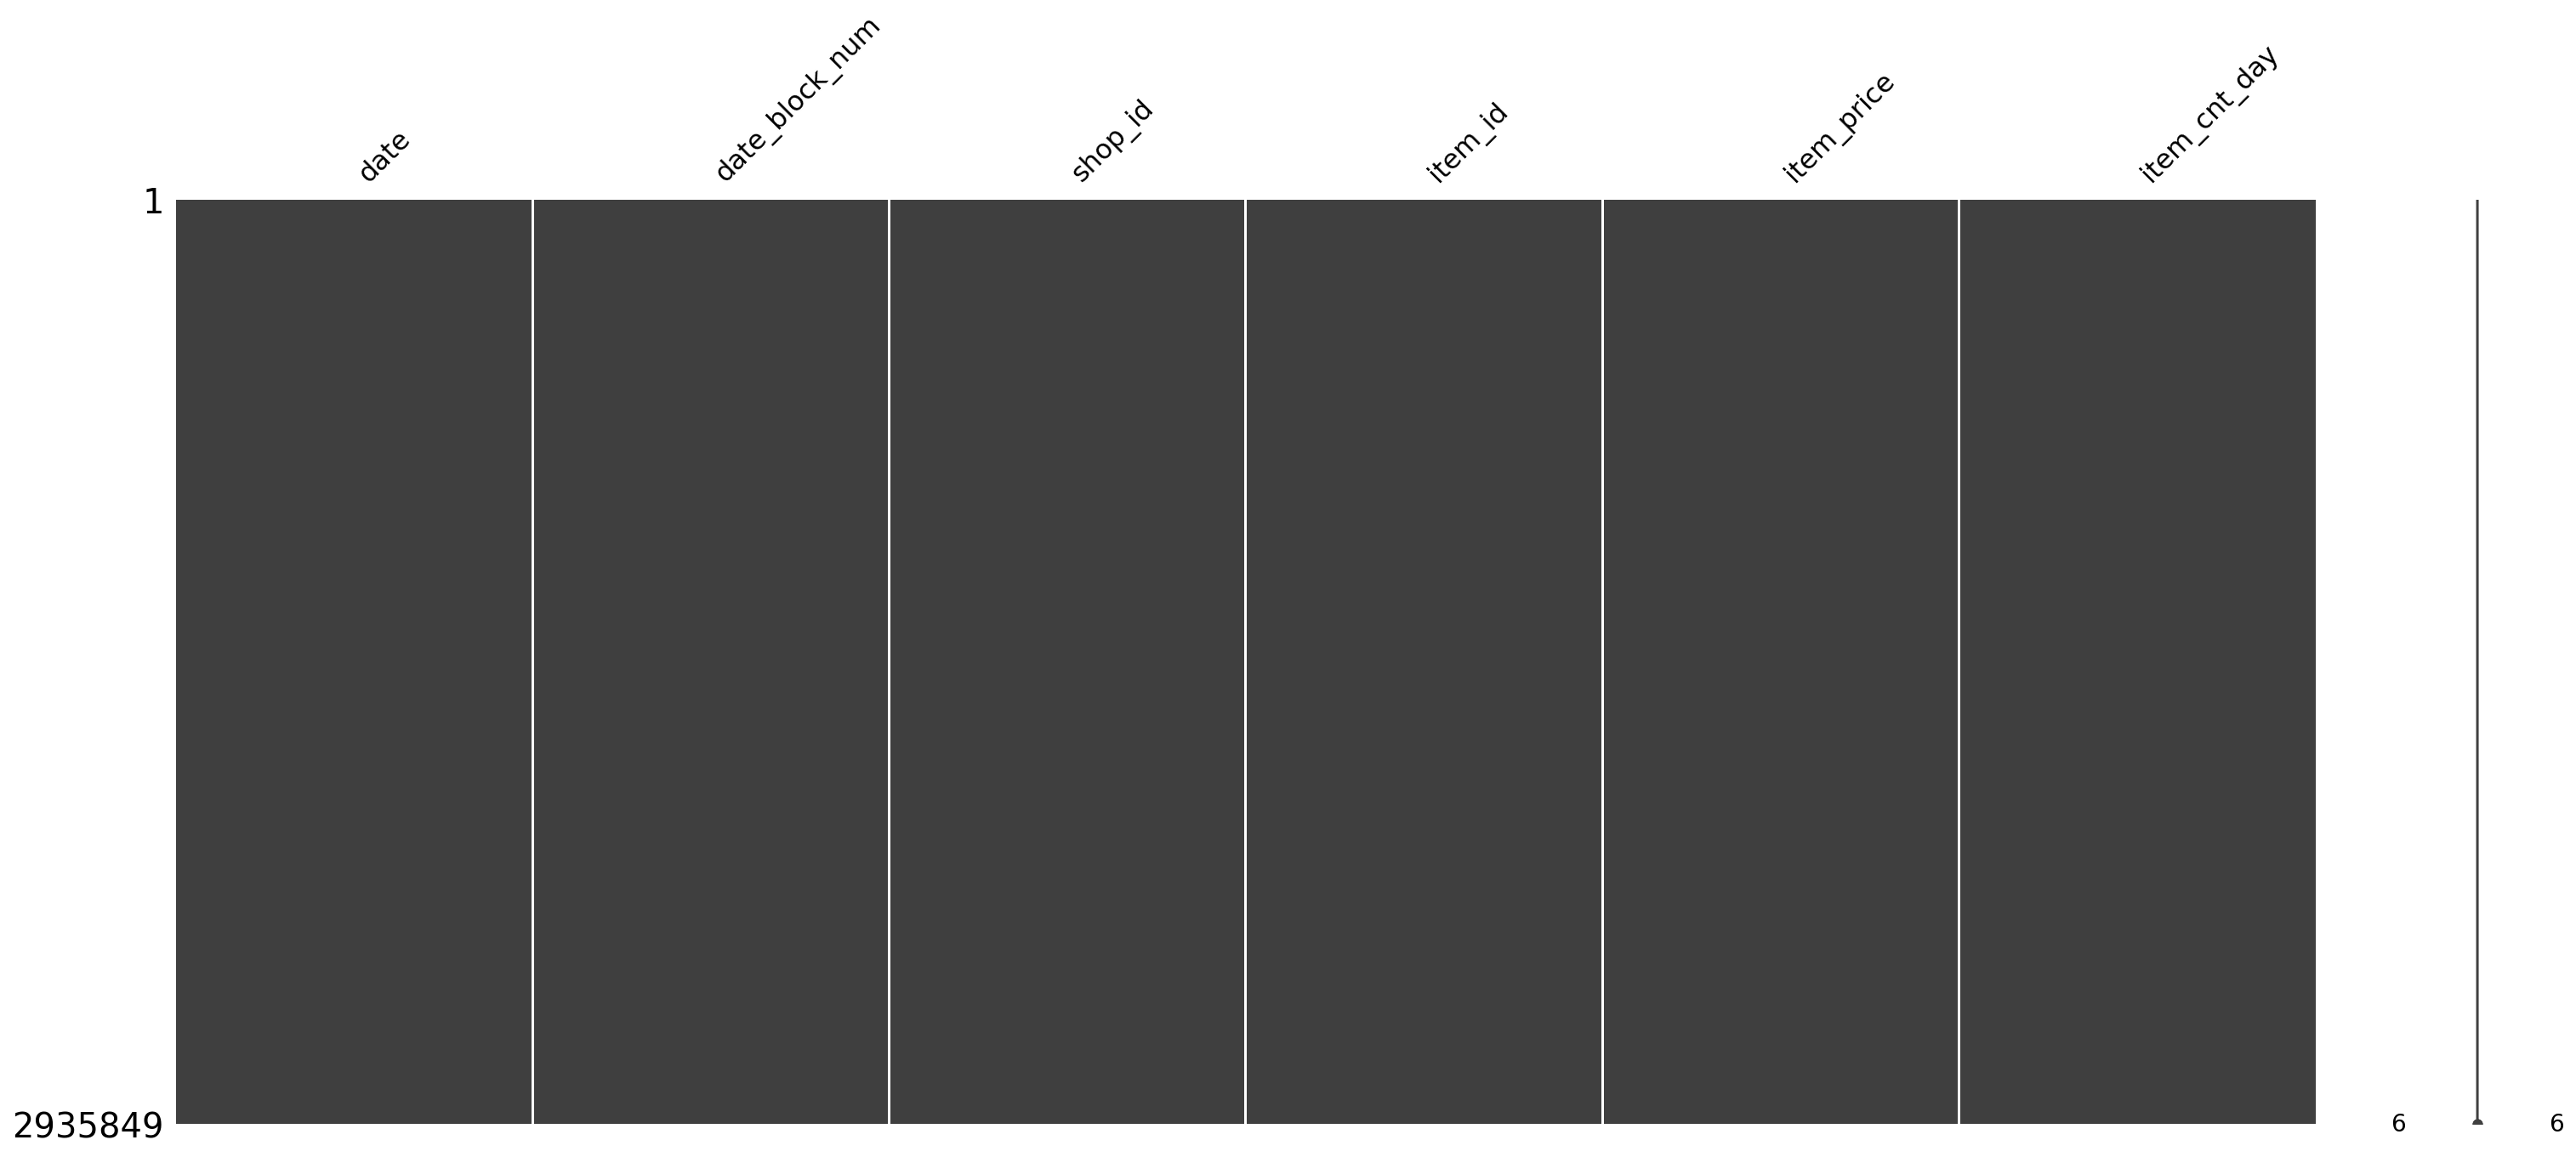

time: 4 s (started: 2021-02-10 01:07:19 +09:00)


In [ ]:
msno.matrix(train)

- train 데이터에서는 결측치가 확인되지 않았다.

#### test

In [ ]:
np.sum(pd.isnull(test))

ID         0
shop_id    0
item_id    0
dtype: int64

time: 4.11 ms (started: 2021-02-10 01:07:23 +09:00)


- test 데이터에서도 결측치가 확인되지 않았다.

In [ ]:
train_ori = train.copy()

time: 49.8 ms (started: 2021-02-10 01:07:23 +09:00)


### 이상치 변경

- 너무 높은 `item_price`를 가진 데이터 제거

In [ ]:
high_price_row = train[train['item_price'] > 100000]
high_price_row

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0


time: 12.5 ms (started: 2021-02-10 08:24:06 +09:00)


In [ ]:
train_outlier_removed = train.drop(high_price_row.index)
train_outlier_removed[train_outlier_removed['item_price'] > 100000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day


time: 125 ms (started: 2021-02-10 08:24:06 +09:00)


- `item_price`가 음수인 데이터 제거

In [ ]:
minor_price_row = train_outlier_removed[train_outlier_removed['item_price'] < 0]
minor_price_row

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


time: 11.2 ms (started: 2021-02-10 08:24:09 +09:00)


In [ ]:
train_outlier_removed = train_outlier_removed.drop(minor_price_row.index)
train_outlier_removed[train_outlier_removed['item_price'] < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day


time: 230 ms (started: 2021-02-10 08:24:09 +09:00)


- 너무 높은 `item_cnt_day`를 가지는 데이터 제거

In [ ]:
high_cnt_row = train_outlier_removed[train_outlier_removed['item_cnt_day'] > 1000]
high_cnt_row

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2909818,28.10.2015,33,12,11373,0.908714,2169.0


time: 10.2 ms (started: 2021-02-10 08:24:13 +09:00)


In [ ]:
train_outlier_removed = train_outlier_removed.drop(high_cnt_row.index)
train_outlier_removed[train_outlier_removed['item_cnt_day'] > 1000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day


time: 207 ms (started: 2021-02-10 08:24:13 +09:00)


### 불필요한 Column 제거

- train 데이터에서 `date`를 제거한다.

In [ ]:
train_remove_column = train_outlier_removed.drop(['date'], axis=1)
train_remove_column

,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,0,59,22154,999.00,1.00
1,0,25,2552,899.00,1.00
2,0,25,2552,899.00,-1.00
3,0,25,2554,1709.05,1.00
4,0,25,2555,1099.00,1.00
...,...,...,...,...,...
2935844,33,25,7409,299.00,1.00
2935845,33,25,7460,299.00,1.00
2935846,33,25,7459,349.00,1.00
2935847,33,25,7440,299.00,1.00


time: 51.5 ms (started: 2021-02-10 10:17:03 +09:00)


### train 데이터 그룹화

- date_block_num, shop_id, item_id를 기준으로 item_cnt_day를 더한 데이터프레임 a와 date_block_num, shop_id, item_id를 기준으로 item_price를 평균낸 데이터프레임 b를 합하여 새로운 train 데이터를 생성한다.

In [ ]:
a = train_remove_column.groupby(['date_block_num','shop_id','item_id']).sum().reset_index()
a.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,0,0,32,884.00,6.00
1,0,0,33,1041.00,3.00
2,0,0,35,247.00,1.00
3,0,0,43,221.00,1.00
4,0,0,51,257.00,2.00


time: 632 ms (started: 2021-02-10 10:17:11 +09:00)


In [ ]:
b = train_remove_column.groupby(['date_block_num','shop_id','item_id']).mean().reset_index()
b.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,0,0,32,221.00,1.50
1,0,0,33,347.00,1.00
2,0,0,35,247.00,1.00
3,0,0,43,221.00,1.00
4,0,0,51,128.50,1.00


time: 589 ms (started: 2021-02-10 10:17:12 +09:00)


In [ ]:
train_merged = a.copy()
train_merged['item_price'] = b['item_price']
train_merged

,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,0,0,32,221.00,6.00
1,0,0,33,347.00,3.00
2,0,0,35,247.00,1.00
3,0,0,43,221.00,1.00
4,0,0,51,128.50,2.00
...,...,...,...,...,...
1609118,33,59,22087,119.00,6.00
1609119,33,59,22088,119.00,2.00
1609120,33,59,22091,179.00,1.00
1609121,33,59,22100,629.00,1.00


time: 28.4 ms (started: 2021-02-10 10:17:13 +09:00)


In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
train_merged.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,1609123.00,1609123.00,1609123.00,1609123.00,1609123.00
mean,14.66,32.81,10680.99,790.69,2.27
std,9.54,16.54,6238.88,1532.59,8.47
min,0.00,0.00,0.00,0.09,-22.00
25%,6.00,21.00,5045.00,199.00,1.00
50%,14.00,31.00,10497.00,399.00,1.00
75%,23.00,47.00,16060.00,898.50,2.00
max,33.00,59.00,22169.00,50999.00,1644.00


time: 267 ms (started: 2021-02-10 10:17:16 +09:00)


In [ ]:
train_merged[train_merged['item_cnt_day'] == 0]

,date_block_num,shop_id,item_id,item_price,item_cnt_day
4147,0,2,5643,2387.61,0.00
5609,0,4,7218,1594.00,0.00
6558,0,6,3676,2199.00,0.00
6566,0,6,3778,899.00,0.00
6753,0,6,5753,3490.00,0.00
...,...,...,...,...,...
1604609,33,52,18187,299.00,0.00
1605819,33,56,1538,999.00,0.00
1605876,33,56,3237,1998.00,0.00
1606537,33,56,19858,249.00,0.00


time: 11.5 ms (started: 2021-02-10 10:17:20 +09:00)


In [ ]:
train_merged[train_merged['item_cnt_day'] < 0]

,date_block_num,shop_id,item_id,item_price,item_cnt_day
5821,0,4,12211,1399.00,-1.00
7326,0,6,12283,1999.00,-1.00
11045,0,12,1590,2599.00,-13.00
11046,0,12,1592,3999.00,-1.00
11047,0,12,1593,1799.00,-6.00
...,...,...,...,...,...
1590963,33,26,10513,1499.00,-1.00
1591278,33,26,21363,3199.00,-1.00
1595028,33,34,7233,599.00,-1.00
1602434,33,48,2860,1799.00,-1.00


time: 9.61 ms (started: 2021-02-10 10:17:21 +09:00)


In [ ]:
train_merged

,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,0,0,32,221.00,6.00
1,0,0,33,347.00,3.00
2,0,0,35,247.00,1.00
3,0,0,43,221.00,1.00
4,0,0,51,128.50,2.00
...,...,...,...,...,...
1609118,33,59,22087,119.00,6.00
1609119,33,59,22088,119.00,2.00
1609120,33,59,22091,179.00,1.00
1609121,33,59,22100,629.00,1.00


time: 8.54 ms (started: 2021-02-10 10:20:59 +09:00)


### 필요한 column 추가

In [ ]:
train_add_column = pd.merge(train_merged, items, left_on='item_id', right_on='item_id', how='left')
train_add_column = train_add_column.drop(['item_name'], axis=1)
train_add_column.head(10)

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,0,0,32,221.00,6.00,40
1,0,0,33,347.00,3.00,37
2,0,0,35,247.00,1.00,40
3,0,0,43,221.00,1.00,40
4,0,0,51,128.50,2.00,57
5,0,0,61,195.00,1.00,43
6,0,0,75,76.00,1.00,40
7,0,0,88,76.00,1.00,40
8,0,0,95,193.00,1.00,40
9,0,0,96,70.00,1.00,40


time: 300 ms (started: 2021-02-10 10:21:09 +09:00)


In [ ]:
train_add_column = pd.merge(train_add_column, item_categories_eng, left_on='item_category_id', right_on='item_category_id', how='left')
train_add_column = train_add_column.drop(['item_category_name'], axis=1)
train_add_column.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,item_category_name_eng
0,0,0,32,221.00,6.00,40,Movie - DVD
1,0,0,33,347.00,3.00,37,Cinema - Blu-Ray
2,0,0,35,247.00,1.00,40,Movie - DVD
3,0,0,43,221.00,1.00,40,Movie - DVD
4,0,0,51,128.50,2.00,57,Music - MP3


time: 239 ms (started: 2021-02-10 10:21:52 +09:00)


In [ ]:
train_add_column.loc[(train_add_column['item_category_name_eng']=='Service - Tickets'), 'item_category_name_eng'] = "Service_Tickets"
train_add_column[train_add_column['item_category_name_eng']=='Service_Tickets']

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,item_category_name_eng
1386174,27,6,9254,1100.00,1.00,80,Service_Tickets
1386974,27,7,9250,1300.00,1.00,80,Service_Tickets
1387980,27,12,9244,900.00,4.00,80,Service_Tickets
1387981,27,12,9248,1300.00,13.00,80,Service_Tickets
1387982,27,12,9252,1100.00,1.00,80,Service_Tickets
...,...,...,...,...,...,...,...
1574826,32,56,9250,1533.33,18.00,80,Service_Tickets
1574827,32,56,9254,1320.00,19.00,80,Service_Tickets
1577339,32,59,9246,1100.00,2.00,80,Service_Tickets
1577340,32,59,9250,1500.00,12.00,80,Service_Tickets


time: 259 ms (started: 2021-02-10 10:22:46 +09:00)


In [ ]:
train_add_column['main_category_name'] = train_add_column.item_category_name_eng.str.split('-').str[0]
train_add_column = train_add_column.drop(['item_category_name_eng'], axis=1)
train_add_column.head(10)

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,main_category_name
0,0,0,32,221.00,6.00,40,Movie
1,0,0,33,347.00,3.00,37,Cinema
2,0,0,35,247.00,1.00,40,Movie
3,0,0,43,221.00,1.00,40,Movie
4,0,0,51,128.50,2.00,57,Music
5,0,0,61,195.00,1.00,43,Books
6,0,0,75,76.00,1.00,40,Movie
7,0,0,88,76.00,1.00,40,Movie
8,0,0,95,193.00,1.00,40,Movie
9,0,0,96,70.00,1.00,40,Movie


time: 3.17 s (started: 2021-02-10 10:22:54 +09:00)


In [ ]:
train_add_column['main_category_name'] = train_add_column['main_category_name'].str.replace(r' +', '')
train_add_column['main_category_name'] = train_add_column['main_category_name'].str.replace(r'(', '_')
train_add_column['main_category_name'] = train_add_column['main_category_name'].str.replace(r')', '')
train_add_column['main_category_name'] = train_add_column['main_category_name'].str.replace(r',', '_')
train_add_column.main_category_name.unique()

array(['Movie', 'Cinema', 'Music', 'Books', 'Programs', 'PCGames',
       'Gifts', 'Games', 'Accessories', 'Gameconsoles', 'Paymentcards',
       'Blankmedia_spire', 'Blankmedia_piece', 'Batteries', 'Service',
       'Deliveryofgoods', 'PC', 'Paymentcards_Cinema_Music_Games',
       'GameConsoles', 'Tickets_Number', 'MACGames', 'AndroidGames',
       'Service_Tickets', 'PaymentCards'], dtype=object)

time: 4.03 s (started: 2021-02-10 10:27:13 +09:00)


In [ ]:
train_encoded = pd.concat([train_add_column, pd.get_dummies(train_add_column['main_category_name'], prefix="main_category")],axis=1)
train_encoded = train_encoded.drop(['main_category_name'], axis=1)
train_encoded

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,main_category_Accessories,main_category_AndroidGames,main_category_Batteries,main_category_Blankmedia_piece,...,main_category_Music,main_category_PC,main_category_PCGames,main_category_PaymentCards,main_category_Paymentcards,main_category_Paymentcards_Cinema_Music_Games,main_category_Programs,main_category_Service,main_category_Service_Tickets,main_category_Tickets_Number
0,0,0,32,221.00,6.00,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,33,347.00,3.00,37,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35,247.00,1.00,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,43,221.00,1.00,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,51,128.50,2.00,57,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609118,33,59,22087,119.00,6.00,83,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1609119,33,59,22088,119.00,2.00,83,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1609120,33,59,22091,179.00,1.00,83,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1609121,33,59,22100,629.00,1.00,42,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


time: 560 ms (started: 2021-02-10 10:29:13 +09:00)


### train 데이터 분포 확인

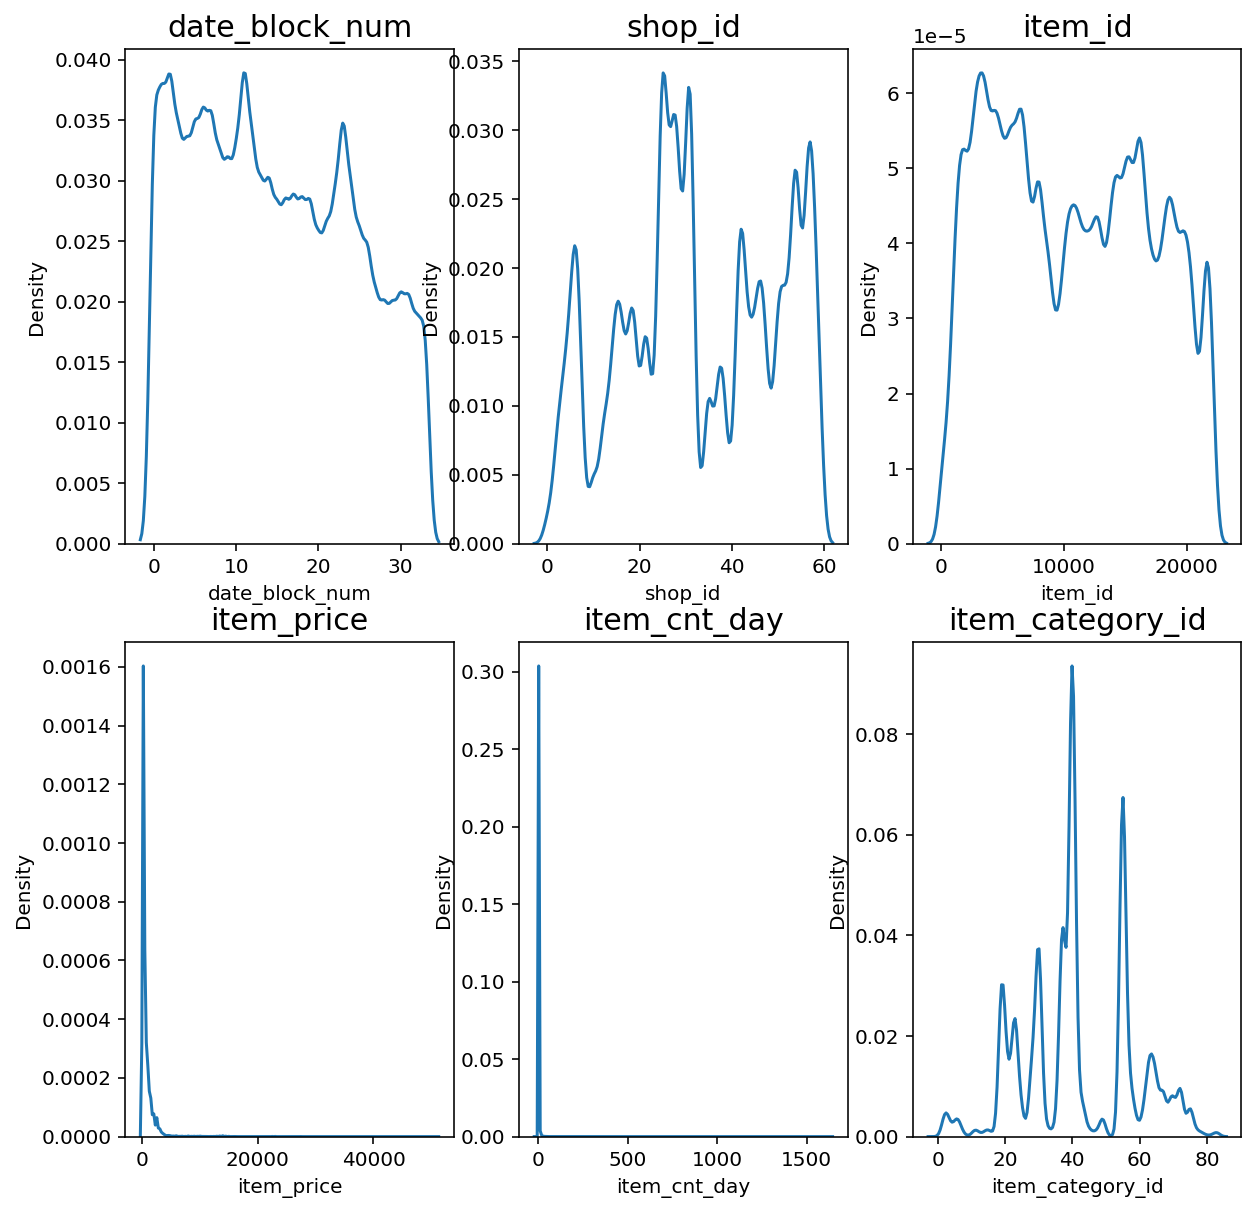

time: 36.7 s (started: 2021-02-10 10:29:36 +09:00)


In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(10, 10)) 

count = 0
columns = train_encoded.columns
for row in range(2):
    for col in range(3):
        sns.kdeplot(train_encoded[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 6 :
            break

- `item_cnt_day` 데이터가 한 쪽으로 치우쳐진 경향을 보이고 있다.
- `item_cnt_day`에 대하여 log-scaling을 진행하여 데이터의 분포를 고르게 변화시켜 준다.

In [ ]:
def safe_log1p(x):
    return np.array([ np.log1p(i) if i > 0 else 0 for i in x])

time: 419 µs (started: 2021-02-10 10:30:16 +09:00)


In [ ]:
train_log = train_encoded.copy()
train_log['item_cnt_day'] = safe_log1p(train_log['item_cnt_day'].values)

time: 2.65 s (started: 2021-02-10 10:30:18 +09:00)


In [ ]:
train_log = train_encoded.copy()
train_log['item_cnt_day'] = safe_log1p(train_log['item_cnt_day'].values)
train_log['item_price'] = safe_log1p(train_log['item_price'].values)

time: 5.47 s (started: 2021-02-10 10:30:21 +09:00)


/home/aiffel-dj1/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


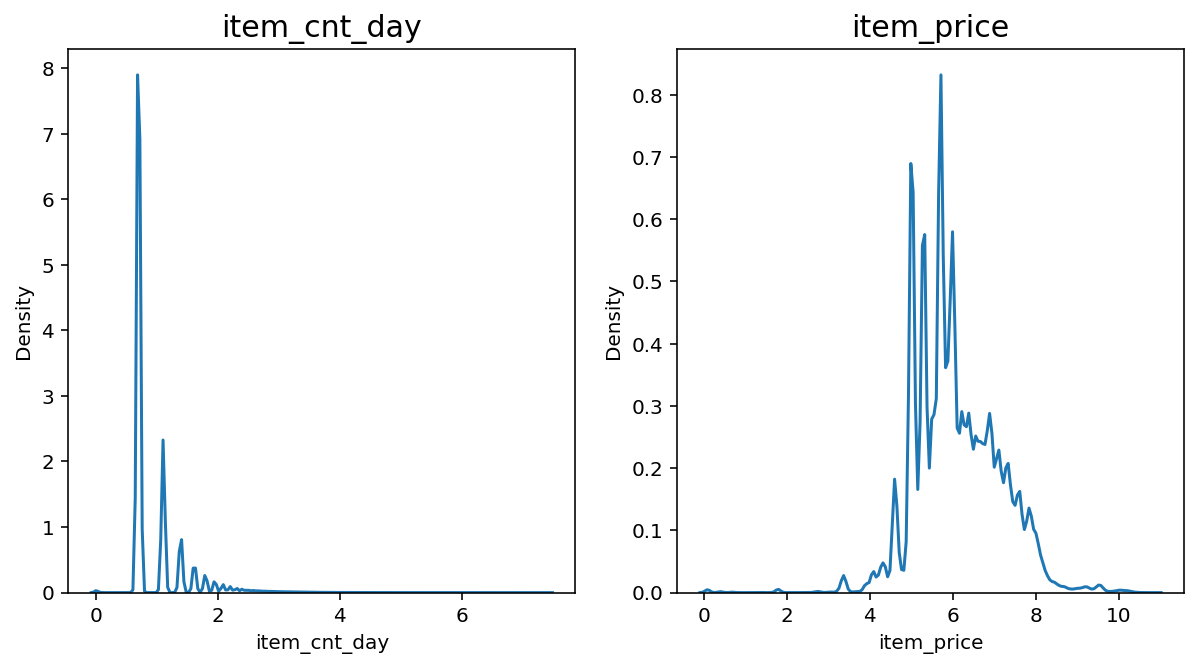

time: 11.7 s (started: 2021-02-10 10:30:31 +09:00)


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 
sns.kdeplot(train_log['item_cnt_day'], ax=ax1)
ax1.set_title('item_cnt_day', fontsize=15)

sns.kdeplot(train_log['item_price'], ax=ax2)
ax2.set_title('item_price', fontsize=15)
fig.show()

### train 데이터 분리

In [ ]:
y = train_log['item_cnt_day']
x_train = train_log.drop(['item_cnt_day'], axis=1)

print(x_train.columns)

Index(['date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_category_id', 'main_category_Accessories',
       'main_category_AndroidGames', 'main_category_Batteries',
       'main_category_Blankmedia_piece', 'main_category_Blankmedia_spire',
       'main_category_Books', 'main_category_Cinema',
       'main_category_Deliveryofgoods', 'main_category_GameConsoles',
       'main_category_Gameconsoles', 'main_category_Games',
       'main_category_Gifts', 'main_category_MACGames', 'main_category_Movie',
       'main_category_Music', 'main_category_PC', 'main_category_PCGames',
       'main_category_PaymentCards', 'main_category_Paymentcards',
       'main_category_Paymentcards_Cinema_Music_Games',
       'main_category_Programs', 'main_category_Service',
       'main_category_Service_Tickets', 'main_category_Tickets_Number'],
      dtype='object')
time: 47.7 ms (started: 2021-02-10 10:30:46 +09:00)


In [ ]:
train_path = join(data_dir, 'train_log_main_category.csv')
train_log.to_csv(train_path, index=False)
print(train_path)

/home/aiffel-dj1/workspace/aiffel-exploration-workspace/E10_kaggle/AIFFEL_1st_Hackathon/1.data/train_log_main_category.csv
time: 10.5 s (started: 2021-02-10 10:31:00 +09:00)


### Test 데이터 가공

#### Test column 추가/삭제

- test 데이터에 `date_block_num` column을 추가하고 모든 값은 34로 채운다.
- `item_category_id`를 추가한다.
- `ID`를 변수 `sub_id`에 저장하고, ID를 test에서 제거한다.

In [ ]:
test_merge = test.copy()
test_merge["date_block_num"] = 34

sub_id = test_merge["ID"]
test_merge = test_merge.drop(['ID'], axis=1)

time: 5.95 ms (started: 2021-02-10 08:58:55 +09:00)


In [ ]:
test_merge = pd.merge(test_merge, items, left_on='item_id', right_on='item_id', how='left')
test_merge = test_merge.drop(['item_name'], axis=1)

time: 36.5 ms (started: 2021-02-10 08:58:55 +09:00)


In [ ]:
test_merge

,shop_id,item_id,date_block_num,item_category_id
0,5,5037,34,19
1,5,5320,34,55
2,5,5233,34,19
3,5,5232,34,23
4,5,5268,34,20
...,...,...,...,...
214195,45,18454,34,55
214196,45,16188,34,64
214197,45,15757,34,55
214198,45,19648,34,40


time: 7.98 ms (started: 2021-02-10 10:33:11 +09:00)


#### Test column 추가 - price

1. 같은 shop_id, item_id를 가지는 항목의 평균

In [ ]:
price_candidate_1 = train_log.groupby(['item_id', 'shop_id']).mean().reset_index().iloc[:, :6]
price_candidate_1 = price_candidate_1.drop(['date_block_num', 'item_cnt_day', 'item_category_id'], axis=1)
price_candidate_1

,item_id,shop_id,item_price
0,0,54,4.08
1,1,55,8.41
2,2,54,4.08
3,3,54,4.35
4,4,54,4.08
...,...,...,...
424118,22168,12,6.68
424119,22168,16,6.68
424120,22168,42,6.68
424121,22168,43,6.68


time: 1.25 s (started: 2021-02-10 10:37:29 +09:00)


In [ ]:
test_1 = pd.merge(test_merge, price_candidate_1, on=['item_id','shop_id'], how='left')
test_1

,shop_id,item_id,date_block_num,item_category_id,item_price
0,5,5037,34,19,7.36
1,5,5320,34,55,nan
2,5,5233,34,19,6.72
3,5,5232,34,23,6.40
4,5,5268,34,20,nan
...,...,...,...,...,...
214195,45,18454,34,55,5.16
214196,45,16188,34,64,nan
214197,45,15757,34,55,5.30
214198,45,19648,34,40,nan


time: 83.2 ms (started: 2021-02-10 10:37:38 +09:00)


2. 같은 category 같은 shop_id의 평균

In [ ]:
price_candidate_2 = train_log.groupby(['item_category_id', 'shop_id']).mean().reset_index().iloc[:, :6]
price_candidate_2 = price_candidate_2.drop(['date_block_num', 'item_id','item_cnt_day'], axis=1)
price_candidate_2

,item_category_id,shop_id,item_price
0,0,0,4.54
1,0,25,5.00
2,0,38,3.15
3,1,0,5.65
4,1,45,5.00
...,...,...,...
3266,83,54,4.63
3267,83,56,4.62
3268,83,57,4.72
3269,83,58,4.74


time: 405 ms (started: 2021-02-10 10:38:37 +09:00)


In [ ]:
def update_price_2(x):
    if pd.isna(x['item_price']):
        search_res = price_candidate_2.loc[(price_candidate_2['item_category_id'] == x['item_category_id']) & 
                                (price_candidate_2['shop_id'] == x['shop_id'])].values
        if len(search_res) > 0: return search_res[0][2]
    return x['item_price']

time: 1.97 ms (started: 2021-02-10 10:38:48 +09:00)


In [ ]:
test_2 = test_1.copy()
test_2['item_price'] = test_2.apply(update_price_2, axis=1)
test_2

,shop_id,item_id,date_block_num,item_category_id,item_price
0,5,5037,34,19,7.36
1,5,5320,34,55,5.61
2,5,5233,34,19,6.72
3,5,5232,34,23,6.40
4,5,5268,34,20,7.79
...,...,...,...,...,...
214195,45,18454,34,55,5.16
214196,45,16188,34,64,6.88
214197,45,15757,34,55,5.30
214198,45,19648,34,40,5.40


time: 1min 24s (started: 2021-02-10 10:39:06 +09:00)


In [ ]:
np.sum(pd.isnull(test_2))

shop_id                 0
item_id                 0
date_block_num          0
item_category_id        0
item_price          24137
dtype: int64

time: 6.68 ms (started: 2021-02-10 10:41:00 +09:00)


In [ ]:
test_1_nan_index = test_1['item_price'].isnull()
test_2[test_1_nan_index]

,shop_id,item_id,date_block_num,item_category_id,item_price
1,5,5320,34,55,5.61
4,5,5268,34,20,7.79
9,5,5003,34,20,7.79
16,5,4874,34,72,7.06
21,5,5002,34,19,7.08
...,...,...,...,...,...
214188,45,9500,34,40,5.40
214189,45,16007,34,64,6.88
214194,45,18027,34,70,5.72
214196,45,16188,34,64,6.88


time: 11.4 ms (started: 2021-02-10 10:41:02 +09:00)


3. 같은 category의 price 평균

In [ ]:
price_candidate_3 = train_log.groupby(['item_category_id']).mean().reset_index().iloc[:, :6]
price_candidate_3 = price_candidate_3.drop(['date_block_num', 'shop_id', 'item_id', 'item_cnt_day'], axis=1)
price_candidate_3

,item_category_id,item_price
0,0,4.23
1,1,5.33
2,2,7.59
3,3,7.33
4,4,5.92
...,...,...
79,79,6.70
80,80,7.06
81,81,5.27
82,82,3.44


time: 382 ms (started: 2021-02-10 10:41:07 +09:00)


In [ ]:
def update_price_3(x):
    if pd.isna(x['item_price']):
        search_res = price_candidate_3.loc[(price_candidate_3['item_category_id'] == x['item_category_id'])].values
        if len(search_res) > 0: return search_res[0][1]
    return x['item_price']

time: 448 µs (started: 2021-02-10 10:41:12 +09:00)


In [ ]:
test_3 = test_2.copy()
test_3['item_price'] = test_3.apply(update_price_3, axis=1)
test_3

,shop_id,item_id,date_block_num,item_category_id,item_price
0,5,5037,34,19,7.36
1,5,5320,34,55,5.61
2,5,5233,34,19,6.72
3,5,5232,34,23,6.40
4,5,5268,34,20,7.79
...,...,...,...,...,...
214195,45,18454,34,55,5.16
214196,45,16188,34,64,6.88
214197,45,15757,34,55,5.30
214198,45,19648,34,40,5.40


time: 17.1 s (started: 2021-02-10 10:41:13 +09:00)


In [ ]:
np.sum(pd.isnull(test_3))

shop_id             0
item_id             0
date_block_num      0
item_category_id    0
item_price          0
dtype: int64

time: 4.71 ms (started: 2021-02-10 10:41:30 +09:00)


In [ ]:
test_2_nan_index = test_2['item_price'].isnull()
test_3[test_2_nan_index]

,shop_id,item_id,date_block_num,item_category_id,item_price
200,5,6731,34,31,5.47
550,5,3022,34,31,5.47
612,5,1884,34,31,5.47
613,5,1885,34,31,5.47
683,5,3349,34,31,5.47
...,...,...,...,...,...
213832,45,3219,34,76,7.16
213833,45,3002,34,76,7.16
213834,45,2987,34,76,7.16
213835,45,2944,34,31,5.47


time: 9.28 ms (started: 2021-02-10 10:41:30 +09:00)


#### category name와 main_category 추가

In [ ]:
test_merged = pd.merge(test_3, item_categories_eng, left_on='item_category_id', right_on='item_category_id', how='left')
test_merged = test_merged.drop(['item_category_name'], axis=1)
test_merged.head(10)

,shop_id,item_id,date_block_num,item_category_id,item_price,item_category_name_eng
0,5,5037,34,19,7.36,Games - PS3
1,5,5320,34,55,5.61,Music - locally produced CD
2,5,5233,34,19,6.72,Games - PS3
3,5,5232,34,23,6.40,Games - XBOX 360
4,5,5268,34,20,7.79,Games - PS4
5,5,5039,34,23,7.47,Games - XBOX 360
6,5,5041,34,20,8.27,Games - PS4
7,5,5046,34,55,5.78,Music - locally produced CD
8,5,5319,34,55,5.70,Music - locally produced CD
9,5,5003,34,20,7.79,Games - PS4


time: 41.6 ms (started: 2021-02-10 10:42:52 +09:00)


In [ ]:
test_merged.loc[(test_merged['item_category_name_eng']=='Service - Tickets'), 'item_category_name_eng'] = "Service_Tickets"
test_merged[test_merged['item_category_name_eng']=='Service_Tickets']

,shop_id,item_id,date_block_num,item_category_id,item_price,item_category_name_eng


time: 49.6 ms (started: 2021-02-10 10:42:58 +09:00)


In [ ]:
test_merged['main_category_name'] = test_merged.item_category_name_eng.str.split('-').str[0]
test_merged = test_merged.drop(['item_category_name_eng'], axis=1)
test_merged.head(10)

,shop_id,item_id,date_block_num,item_category_id,item_price,main_category_name
0,5,5037,34,19,7.36,Games
1,5,5320,34,55,5.61,Music
2,5,5233,34,19,6.72,Games
3,5,5232,34,23,6.40,Games
4,5,5268,34,20,7.79,Games
5,5,5039,34,23,7.47,Games
6,5,5041,34,20,8.27,Games
7,5,5046,34,55,5.78,Music
8,5,5319,34,55,5.70,Music
9,5,5003,34,20,7.79,Games


time: 488 ms (started: 2021-02-10 10:43:02 +09:00)


In [ ]:
test_merged['main_category_name'] = test_merged['main_category_name'].str.replace(r' +', '')
test_merged['main_category_name'] = test_merged['main_category_name'].str.replace(r'(', '_')
test_merged['main_category_name'] = test_merged['main_category_name'].str.replace(r')', '')
test_merged['main_category_name'] = test_merged['main_category_name'].str.replace(r',', '_')
test_merged.main_category_name.unique()

array(['Games', 'Music', 'PCGames', 'Gifts', 'Paymentcards',
       'Accessories', 'Movie', 'Cinema', 'Books', 'Gameconsoles',
       'Service', 'Programs', 'Batteries', 'Deliveryofgoods', 'PC',
       'PaymentCards', 'MACGames', 'AndroidGames'], dtype=object)

time: 581 ms (started: 2021-02-10 10:43:39 +09:00)


In [ ]:
test_merged = pd.concat([test_merged, pd.get_dummies(test_merged['main_category_name'], prefix="main_category")],axis=1)
test_merged

,shop_id,item_id,date_block_num,item_category_id,item_price,main_category_name,main_category_Accessories,main_category_AndroidGames,main_category_Batteries,main_category_Books,...,main_category_Gifts,main_category_MACGames,main_category_Movie,main_category_Music,main_category_PC,main_category_PCGames,main_category_PaymentCards,main_category_Paymentcards,main_category_Programs,main_category_Service
0,5,5037,34,19,7.36,Games,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,5320,34,55,5.61,Music,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,5,5233,34,19,6.72,Games,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,5232,34,23,6.40,Games,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,5268,34,20,7.79,Games,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,45,18454,34,55,5.16,Music,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
214196,45,16188,34,64,6.88,Gifts,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
214197,45,15757,34,55,5.30,Music,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
214198,45,19648,34,40,5.40,Movie,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


time: 106 ms (started: 2021-02-10 10:45:17 +09:00)


In [ ]:
main_category_list = train_log.columns[6:]

columns = test_merged.columns
for c in main_category_list:
    if c not in columns: test_merged[c] = 0

time: 8.22 ms (started: 2021-02-10 10:46:54 +09:00)


In [ ]:
test_merged = test_merged.drop(['main_category_name'], axis=1)
test_merged.head(10)

,shop_id,item_id,date_block_num,item_category_id,item_price,main_category_Accessories,main_category_AndroidGames,main_category_Batteries,main_category_Books,main_category_Cinema,...,main_category_PaymentCards,main_category_Paymentcards,main_category_Programs,main_category_Service,main_category_Blankmedia_piece,main_category_Blankmedia_spire,main_category_GameConsoles,main_category_Paymentcards_Cinema_Music_Games,main_category_Service_Tickets,main_category_Tickets_Number
0,5,5037,34,19,7.36,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,5320,34,55,5.61,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,5233,34,19,6.72,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,5232,34,23,6.40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,5268,34,20,7.79,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,5039,34,23,7.47,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,5,5041,34,20,8.27,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,5,5046,34,55,5.78,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,5319,34,55,5.70,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,5,5003,34,20,7.79,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


time: 32.6 ms (started: 2021-02-10 10:47:00 +09:00)


#### 정제된 테스트 데이터 저장

In [ ]:
test_merged_path = join(data_dir, 'test_main_category.csv')
test_merged.to_csv(test_merged_path, index=False)
print(test_merged_path)

/home/aiffel-dj1/workspace/aiffel-exploration-workspace/E10_kaggle/AIFFEL_1st_Hackathon/1.data/test_main_category.csv
time: 1.06 s (started: 2021-02-10 10:47:09 +09:00)


- 이제 저장된 데이터를 불러와서 사용할 것이다!

In [ ]:
test = pd.read_csv(join(data_dir, 'test_main_category.csv'))

train_merged_log = pd.read_csv(join(data_dir, 'train_log_main_category.csv'))
y = train_merged_log['item_cnt_day']
x_train = train_merged_log.drop(['item_cnt_day'], axis=1)

print(f'x_train shape : {x_train.shape}')
print(f'y shape : {y.shape}')
print(f'test shape : {test.shape}')

x_train shape : (1609123, 29)
y shape : (1609123,)
test shape : (214200, 29)
time: 2.65 s (started: 2021-02-10 12:53:02 +09:00)


## 모델 선정 및 학습

### 수희

#### 설계
회귀모델(lightgbm)을 적용하여 다음달의 판매량을 예측해 보고자 한다.<br/>

1. Grid search + average blending
  - 그리드 서치를 통하여 각 모델에 대한 최적의 하이퍼 파라리터를 탐색한다.
  - 찾아낸 하이퍼 파라미터를 이용하여 각 모델을 학습시키고 average blending을 통하여 최종 결과를 도출한다.
  - 사용된 함수는 다음과 같다.
    - `get_hy_by_gride_search(model, param_grid, x_train, y, verbose=2, n_jobs=5, cv=5)` : 단일 모델에 대한 grid search를 수행하여, 최적의 하이퍼 파라미터를 반환한다.
    - `train_models(x_train, y, test, hps)`: 하이퍼 파라미터 정보를 받아 모델을 학습하고 예측결과를 반환한다.
    - `averaging_blending(predictions)` : 예측 결과들을 입력받아 average blending을 하고 결과를 반환한다.
    - `modeling(models, x_tain, y, test, verbose=2, n_jobs=5, cv=5)` : 위 함수들을 통합하여, 대상 모델 정보를 입력받아 하이퍼 파라미터 search + average blending 된 예측값을 반환한다.


2. lightgbm
  - 위의 방식을 사용할 때, GradientBoostingRegressor, XGBRegressor, LGBMRegressor 세가지 모델을 중점으로 실험을 진행하였다.
  - 하지만, GradientBoostingRegressor와 XGBRegressor의 학습 속도가 너무 늦어 진행에 어려움을 겪었고 가장 빠르게 학습이 되는 LGBMRegressor만을 사용하여서 결과 도출을 시도하였다.

In [ ]:
from sklearn.linear_model import LinearRegression # 일반 회귀 모델
from sklearn.linear_model import Ridge, Lasso, ElasticNet # norm 규제 회기 모델
from sklearn.linear_model import ARDRegression, BayesianRidge # 베이지안 회귀
from sklearn.ensemble import RandomForestRegressor # 앙상블 모델, bagging
from sklearn.ensemble import GradientBoostingRegressor # 앙상블 모델, boosting
import xgboost as xgb # 앙상블 모델, boosting
import lightgbm as lgb # 앙상블 모델, boosting
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

rs = 2021

time: 146 ms (started: 2021-02-10 12:53:05 +09:00)


#### 전처리 데이터 검증
- 본 문서의 기록에는 한 가진 유형은 전처리 데이터가 존재하지만, 프로젝트를 진행하면서 총 네가지 버전의 데이터를 사용하였고 이를 train 데이터를 기준으로 설명한면 다음과 같다.

1. `date_block_num, shop_id, item_id`
  - 테스트 데이터와 직접적인 관계가 있는 shop_id, item_id 데이터를 column으로 가지는 데이터셋
  - test 데이터셋에 date_block_num = 34인 column을 추가하여 예측 결과를 볼 수 있도록 하였다.
  - cross_val_score : 0.0560
2. `date_block_num,	shop_id,	item_id,	item_category_id`
  - item_category_id를 추가하여 train 데이터셋에서는 등장하지 않았지만 test 데이셋에서는 등장하는 데이터에 대한 정보를 심어보았다.
  - cross_val_score : 0.2083
4. `date_block_num,	shop_id,	item_id,	item_category_id, item_price`
  - 판매량을 예측할 경우, 판매 금액은 중요한 요소가 될 것이다. 이에 대한 정보를 추가하였다.
  - cross_val_score : 0.2073
5. 4에 아이템의 대분류 값을 넣어 주었다.
  - cross_val_score : 0.2015

#### Grid search + average blending

- 함수 정의

In [ ]:
def get_hy_by_gride_search(model, param_grid, x_train, y, verbose=2, n_jobs=5, cv=5):
    grid_model = GridSearchCV(model,
                              param_grid=param_grid,
                              scoring='neg_mean_squared_error',
                              cv=cv,
                              verbose=verbose,
                              n_jobs=n_jobs)

    grid_model.fit(x_train, y)

    # 결과값 저장
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    # 데이터 프레임 생성
    results = pd.DataFrame(params)
    results['score'] = score

    # RMSLE 값 계산 후 정렬
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')
    if verbose > 1 : display(results)
    
    params = { p : results[:1][p].values[0] for p in param_grid.keys() }
    
    return params, results[:1]['RMSLE'].values[0]

time: 1.6 ms (started: 2021-02-10 12:53:14 +09:00)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor # 앙상블 모델, boosting
import xgboost as xgb # 앙상블 모델, boosting
import lightgbm as lgb # 앙상블 모델, boosting

time: 1.26 ms (started: 2021-02-10 12:53:14 +09:00)


In [ ]:
def train_models(x_train, y, test, hps):
    models = []
    for name, hp in hps.items() : 
        hp = hp['params']
        if name == 'LightGBM' :
            model = lgb.LGBMRegressor(max_depth=hp['max_depth'] ,
                                      n_estimators=hp['n_estimators'],
                                      random_state=rs)
        elif name == 'GradientBoosting':
            model = GradientBoostingRegressor(learning_rate=hp['learning_rate'],
                                              n_estimators=hp['n_estimators'],
                                              random_state=rs)
        elif name == 'XGBoost':
            model = xgb.XGBRegressor(learning_rate=hp['learning_rate'],
                                     max_depth=hp['max_depth'] ,
                                     n_estimators=hp['n_estimators'],
                                     random_state=rs)
        model.fit(x_train.values, y)
        models.append(model)
    
    predictions = np.column_stack([
        m.predict(test.values) for m in models
    ])

    return predictions

time: 2.34 ms (started: 2021-02-10 12:53:16 +09:00)


In [ ]:
def averaging_blending(predictions):
    return np.mean(predictions, axis=1)

time: 1.19 ms (started: 2021-02-10 12:53:18 +09:00)


In [ ]:
def modeling(models, x_tain, y, test, verbose=2, n_jobs=5, cv=5):
    print(f'⭐ [modeling] start to find hyper params')
    
    hps = {}
    for model in models:
        print(f'⭐ [modeling] >>> {model["name"]}')
        params, PMSLE = get_hy_by_gride_search(model['model'], 
                                               model['param_grid'], 
                                               x_tain, 
                                               y, 
                                               verbose=verbose,
                                               n_jobs=n_jobs,
                                               cv=cv)
        hps[model["name"]] = { 'params' : params, 'PMSLE' : PMSLE }
    
    if verbose > 1 :
        print(f'⭐ [modeling] hyper param search end')
        print(hps)
    
    predictions = train_models(x_train, y, test, hps)
    y_pred = averaging_blending(predictions)
    y_pred = np.expm1(y_pred)
    return y_pred

time: 1.8 ms (started: 2021-02-10 12:53:19 +09:00)


- 탐색 결과

In [ ]:
models = [
    {
        'name' : 'LightGBM',
        'model' :  lgb.LGBMRegressor(random_state=rs),
        'param_grid' : {
            'n_estimators': [100, 200, 400],
            'max_depth': [10, 20, 40]
        }
    }
]
   
y_pred = modeling(models, x_train, y, test, verbose=2, n_jobs=10, cv=5)

⭐ [modeling] start to find hyper params
⭐ [modeling] >>> LightGBM
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:  1.2min
[Parallel(n_jobs=10)]: Done  45 out of  45 | elapsed:  2.4min finished


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,max_depth,n_estimators,score,RMSLE
5,20,400,-0.167497,0.409264
8,40,400,-0.167497,0.409264
2,10,400,-0.168118,0.410022
4,20,200,-0.173223,0.416201
7,40,200,-0.173223,0.416201
1,10,200,-0.173809,0.416904
3,20,100,-0.178785,0.422830
6,40,100,-0.178785,0.422830
0,10,100,-0.178923,0.422993


⭐ [modeling] hyper param search end
{'LightGBM': {'params': {'n_estimators': 400, 'max_depth': 20}, 'PMSLE': 0.4092639419765125}}
time: 2min 38s (started: 2021-02-10 12:53:27 +09:00)


In [ ]:
sub = sample_submission.copy()
sub['item_cnt_month'] = y_pred
sub.head()

,ID,item_cnt_month
0,0,6.433868
1,1,3.232737
2,2,6.433868
3,3,6.254655
4,4,6.433868


time: 7.26 ms (started: 2021-02-10 12:57:06 +09:00)


In [ ]:
sub_path = join(submission_dir, 'rmsle_0_4092639419765125.csv')
sub.to_csv(sub_path, index=False)
print(sub_path)

/home/aiffel-dj1/workspace/aiffel-exploration-workspace/E10_kaggle/AIFFEL_1st_Hackathon/3.submission/rmsle_0_4092639419765125.csv
time: 437 ms (started: 2021-02-10 12:57:08 +09:00)


In [ ]:
models = [
    {
        'name' : 'LightGBM',
        'model' :  lgb.LGBMRegressor(random_state=rs),
        'param_grid' : {
            'n_estimators': [200, 400, 800],
            'max_depth': [15, 20, 25]
        }
    }
]
   
y_pred = modeling(models, x_train, y, test, verbose=2, n_jobs=10, cv=5)

⭐ [modeling] start to find hyper params
⭐ [modeling] >>> LightGBM
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:  1.9min
[Parallel(n_jobs=10)]: Done  45 out of  45 | elapsed:  3.9min finished


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,max_depth,n_estimators,score,RMSLE
5,20,800,-0.023952,0.154765
8,25,800,-0.023952,0.154765
2,15,800,-0.024054,0.155093
4,20,400,-0.025258,0.158929
7,25,400,-0.025258,0.158929
1,15,400,-0.025422,0.159443
3,20,200,-0.027484,0.165784
6,25,200,-0.027484,0.165784
0,15,200,-0.027488,0.165795


⭐ [modeling] hyper param search end
{'LightGBM': {'params': {'n_estimators': 800, 'max_depth': 20}, 'PMSLE': 0.15476460219851457}}
time: 4min 15s (started: 2021-02-10 06:50:36 +09:00)


In [ ]:
sub = sample_submission.copy()
sub['item_cnt_month'] = y_pred
sub.head()

sub_path = join(submission_dir, 'rmsle_0.154765.csv')
sub.to_csv(sub_path, index=False)
print(sub_path)

/home/aiffel-dj1/workspace/aiffel-exploration-workspace/E10_kaggle/AIFFEL_1st_Hackathon/3.submission/rmsle_0.154765.csv
time: 423 ms (started: 2021-02-10 06:55:44 +09:00)


In [ ]:
models = [
    {
        'name' : 'LightGBM',
        'model' :  lgb.LGBMRegressor(random_state=rs),
        'param_grid' : {
            'n_estimators': [400, 800, 1600],
            'max_depth': [18, 20, 22]
        }
    }
]
   
y_pred = modeling(models, x_train, y, test, verbose=2, n_jobs=10, cv=5)

⭐ [modeling] start to find hyper params
⭐ [modeling] >>> LightGBM
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:  3.6min
[Parallel(n_jobs=10)]: Done  45 out of  45 | elapsed:  8.0min finished


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,max_depth,n_estimators,score,RMSLE
2,18,1600,-0.023247,0.152468
5,20,1600,-0.023266,0.152532
8,22,1600,-0.023266,0.152532
1,18,800,-0.023895,0.154579
4,20,800,-0.023952,0.154765
7,22,800,-0.023952,0.154765
0,18,400,-0.025250,0.158904
3,20,400,-0.025258,0.158929
6,22,400,-0.025258,0.158929


⭐ [modeling] hyper param search end
{'LightGBM': {'params': {'n_estimators': 1600, 'max_depth': 18}, 'PMSLE': 0.15246845843538992}}
time: 9min 1s (started: 2021-02-10 06:56:58 +09:00)


In [ ]:
sub = sample_submission.copy()
sub['item_cnt_month'] = y_pred
sub.head()

sub_path = join(submission_dir, 'rmsle_0_152468.csv')
sub.to_csv(sub_path, index=False)
print(sub_path)

/home/aiffel-dj1/workspace/aiffel-exploration-workspace/E10_kaggle/AIFFEL_1st_Hackathon/3.submission/rmsle_0_152468.csv
time: 415 ms (started: 2021-02-10 07:06:04 +09:00)


In [ ]:
models = [
    {
        'name' : 'LightGBM',
        'model' :  lgb.LGBMRegressor(random_state=rs),
        'param_grid' : {
            'n_estimators': [800, 1600, 3200],
            'max_depth': [18]
        }
    }
]
   
y_pred = modeling(models, x_train, y, test, verbose=2, n_jobs=10, cv=5)

⭐ [modeling] start to find hyper params
⭐ [modeling] >>> LightGBM
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   4 out of  15 | elapsed:  1.5min remaining:  4.1min
[Parallel(n_jobs=10)]: Done  12 out of  15 | elapsed:  8.1min remaining:  2.0min
[Parallel(n_jobs=10)]: Done  15 out of  15 | elapsed:  8.3min finished


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,max_depth,n_estimators,score,RMSLE
2,18,3200,-0.022975,0.151574
1,18,1600,-0.023247,0.152468
0,18,800,-0.023895,0.154579


⭐ [modeling] hyper param search end
{'LightGBM': {'params': {'n_estimators': 3200, 'max_depth': 18}, 'PMSLE': 0.1515738974607014}}
time: 9min 54s (started: 2021-02-10 07:21:29 +09:00)


In [ ]:
sub = sample_submission.copy()
sub['item_cnt_month'] = y_pred
sub.head()

sub_path = join(submission_dir, 'rmsle_0_151574.csv')
sub.to_csv(sub_path, index=False)
print(sub_path)

/home/aiffel-dj1/workspace/aiffel-exploration-workspace/E10_kaggle/AIFFEL_1st_Hackathon/3.submission/rmsle_0_151574.csv
time: 431 ms (started: 2021-02-10 07:31:37 +09:00)


#### lightgbm

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x_train, y, test_size=0.33, random_state=rs)

cat_features = ['item_category_id','date_block_num','shop_id','item_id']
cat_features += list(x_train.columns[6:])
lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_val, y_val)

time: 712 ms (started: 2021-02-10 12:57:40 +09:00)


In [ ]:
params = {
    'objective': 'rmse',
    'metric': 'rmse',
    'num_leaves': 100,
    'min_data_in_leaf':10,
    'feature_fraction':0.7,
    'learning_rate': 0.01,
    'num_rounds': 1000,
    'early_stopping_rounds': 30,
    'seed': rs,
    'max_depth': 18,
    'n_estimators':1024
}

model = lgb.train(params=params, train_set=lgb_train, valid_sets=(lgb_train, lgb_val), verbose_eval=50,categorical_feature=cat_features)

/home/aiffel-dj1/anaconda3/envs/aiffel/lib/python3.7/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/aiffel-dj1/anaconda3/envs/aiffel/lib/python3.7/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/aiffel-dj1/anaconda3/envs/aiffel/lib/python3.7/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/aiffel-dj1/anaconda3/envs/aiffel/lib/python3.7/site-packages/lightgbm/basic.py:1555: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['date_block_num', 'item_category_id', 'item_id', '

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12332
[LightGBM] [Info] Number of data points in the train set: 1078112, number of used features: 26


/home/aiffel-dj1/anaconda3/envs/aiffel/lib/python3.7/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/home/aiffel-dj1/anaconda3/envs/aiffel/lib/python3.7/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 0.956625
Training until validation scores don't improve for 30 rounds
[50]	training's rmse: 0.433385	valid_1's rmse: 0.435982
[100]	training's rmse: 0.401987	valid_1's rmse: 0.405959
[150]	training's rmse: 0.382583	valid_1's rmse: 0.387611
[200]	training's rmse: 0.370088	valid_1's rmse: 0.376132
[250]	training's rmse: 0.361533	valid_1's rmse: 0.368521
[300]	training's rmse: 0.354583	valid_1's rmse: 0.362369
[350]	training's rmse: 0.348832	valid_1's rmse: 0.357219
[400]	training's rmse: 0.343545	valid_1's rmse: 0.352619
[450]	training's rmse: 0.339037	valid_1's rmse: 0.348704
[500]	training's rmse: 0.33566	valid_1's rmse: 0.345784
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[550]	training's rmse: 0.332765	valid_1's rmse: 0.34325
[600]	training's rmse: 0.330038	valid

In [ ]:
sub = sample_submission.copy()
sub['item_cnt_month'] = model.predict(test).clip(0,20)
sub.head()

sub_path = join(submission_dir, 'rmsle_0_331242.csv')
sub.to_csv(sub_path, index=False)
print(sub_path)

/home/aiffel-dj1/workspace/aiffel-exploration-workspace/E10_kaggle/AIFFEL_1st_Hackathon/3.submission/rmsle_0_331242.csv
time: 5.61 s (started: 2021-02-10 12:59:48 +09:00)


In [ ]:
params = {
    'objective': 'rmse',
    'metric': 'rmse',
    'num_leaves': 200,
    'min_data_in_leaf':10,
    'feature_fraction':0.7,
    'learning_rate': 0.01,
    'num_rounds': 1000,
    'early_stopping_rounds': 30,
    'seed': rs,
    'max_depth': 18,
    'n_estimators':2000
}

model_2 = lgb.train(params=params, train_set=lgb_train, valid_sets=(lgb_train, lgb_val), verbose_eval=50,categorical_feature=cat_features)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12332
[LightGBM] [Info] Number of data points in the train set: 1078112, number of used features: 26
[LightGBM] [Info] Start training from score 0.956625
Training until validation scores don't improve for 30 rounds
[50]	training's rmse: 0.428988	valid_1's rmse: 0.432046
[100]	training's rmse: 0.394554	valid_1's rmse: 0.399463
[150]	training's rmse: 0.373058	valid_1's rmse: 0.379366
[200]	training's rmse: 0.359446	valid_1's rmse: 0.36701
[250]	training's rmse: 0.350219	valid_1's rmse: 0.358912
[300]	training's rmse: 0.343121	valid_1's rmse: 0.352819
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[350]	training's rmse: 0.337352	valid_1's rmse: 0.34778
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[400]	training's rmse: 0.332101	valid_1's rms

In [ ]:
model_2.save_model('lgb_model_rmse_324237.txt')

time: 510 ms (started: 2021-02-10 13:04:37 +09:00)


In [ ]:
sub = sample_submission.copy()
sub['item_cnt_month'] = model_2.predict(test).clip(0,20)
sub.head()

sub_path = join(submission_dir, 'rmsle_0_324237.csv')
sub.to_csv(sub_path, index=False)
print(sub_path)

/home/aiffel-dj1/workspace/aiffel-exploration-workspace/E10_kaggle/AIFFEL_1st_Hackathon/3.submission/rmsle_0_324237.csv
time: 6.65 s (started: 2021-02-10 13:04:48 +09:00)


In [ ]:
params = {
    'objective': 'rmse',
    'metric': 'rmse',
    'num_leaves': 100,
    'min_data_in_leaf':10,
    'feature_fraction':0.7,
    'learning_rate': 0.05,
    'num_rounds': 2000,
    'early_stopping_rounds': 30,
    'seed': rs,
    'max_depth': 18,
    'n_estimators':3200
}

model_3 = lgb.train(params=params, train_set=lgb_train, valid_sets=(lgb_train, lgb_val), verbose_eval=50,categorical_feature=cat_features)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018960 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12332
[LightGBM] [Info] Number of data points in the train set: 1078112, number of used features: 26
[LightGBM] [Info] Start training from score 0.956625
Training until validation scores don't improve for 30 rounds
[50]	training's rmse: 0.359688	valid_1's rmse: 0.367052
[100]	training's rmse: 0.33416	valid_1's rmse: 0.345133
[150]	training's rmse: 0.322494	valid_1's rmse: 0.334899
[200]	training's rmse: 0.317768	valid_1's rmse: 0.330761
[250]	training's rmse: 0.313968	valid_1's rmse: 0.327536
[300]	training's rmse: 0.309628	valid_1's rmse: 0.323828
[350]	training's rmse: 0.305499	valid_1's rmse: 0.32045
[400]	training's rmse: 0.302048	valid_1's rmse: 0.317664
[450]	training's rmse: 0.296258	valid_1's rmse: 0.312963
[500]	training's rmse: 0.293137	valid_1's rmse: 0.310586
[LightGBM] [Warning] No 

In [ ]:
model_3.save_model('lgb_model_rmse_291102.txt')

time: 446 ms (started: 2021-02-10 13:11:13 +09:00)


In [ ]:
sub = sample_submission.copy()
sub['item_cnt_month'] = model_3.predict(test).clip(0,20)
sub.head()

sub_path = join(submission_dir, 'rmsle_0_291102.csv')
sub.to_csv(sub_path, index=False)
print(sub_path)

/home/aiffel-dj1/workspace/aiffel-exploration-workspace/E10_kaggle/AIFFEL_1st_Hackathon/3.submission/rmsle_0_291102.csv
time: 10.8 s (started: 2021-02-10 13:11:36 +09:00)


In [ ]:
params = {
    'objective': 'rmse',
    'metric': 'rmse',
    'num_leaves': 100,
    'min_data_in_leaf':10,
    'feature_fraction':0.7,
    'learning_rate': 0.1,
    'num_rounds': 2000,
    'early_stopping_rounds': 30,
    'seed': rs,
    'max_depth': 18,
    'n_estimators':4800
}

model_3 = lgb.train(params=params, train_set=lgb_train, valid_sets=(lgb_train, lgb_val), verbose_eval=50,categorical_feature=cat_features)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023248 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12332
[LightGBM] [Info] Number of data points in the train set: 1078112, number of used features: 26
[LightGBM] [Info] Start training from score 0.956625
Training until validation scores don't improve for 30 rounds
[50]	training's rmse: 0.334041	valid_1's rmse: 0.344926
[100]	training's rmse: 0.316431	valid_1's rmse: 0.329912
[150]	training's rmse: 0.306502	valid_1's rmse: 0.321345
[200]	training's rmse: 0.30018	valid_1's rmse: 0.316278
[250]	training's rmse: 0.294515	valid_1's rmse: 0.311991
[300]	training's rmse: 0.290097	valid_1's rmse: 0.308671
[350]	training's rmse: 0.286224	valid_1's rmse: 0.306022
[400]	training's rmse: 0.28258	valid_1's rmse: 0.303767
[450]	training's rmse: 0.277641	valid_1's rmse: 0.300619
[500]	training's rmse: 0.274436	valid_1's rmse: 0.298707
[LightGBM] [Warning] No 

In [ ]:
model_3.save_model('lgb_model_rmse_289526.txt')

time: 386 ms (started: 2021-02-10 13:17:56 +09:00)


In [ ]:
sub = sample_submission.copy()
sub['item_cnt_month'] = model_3.predict(test).clip(0,20)
sub.head()

sub_path = join(submission_dir, 'rmsle_0_289526.csv')
sub.to_csv(sub_path, index=False)
print(sub_path)

/home/aiffel-dj1/workspace/aiffel-exploration-workspace/E10_kaggle/AIFFEL_1st_Hackathon/3.submission/rmsle_0_289526.csv
time: 9.37 s (started: 2021-02-10 13:18:15 +09:00)


In [ ]:
params = {
    'objective': 'rmse',
    'metric': 'rmse',
    'num_leaves': 100,
    'min_data_in_leaf':10,
    'feature_fraction':0.7,
    'learning_rate': 0.1,
    'num_rounds': 5000,
    'early_stopping_rounds': 30,
    'seed': rs,
    'max_depth': 18,
    'n_estimators':6400
}

model_5 = lgb.train(params=params, train_set=lgb_train, valid_sets=(lgb_train, lgb_val), verbose_eval=50,categorical_feature=cat_features)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020907 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12332
[LightGBM] [Info] Number of data points in the train set: 1078112, number of used features: 26
[LightGBM] [Info] Start training from score 0.956625
Training until validation scores don't improve for 30 rounds
[50]	training's rmse: 0.334041	valid_1's rmse: 0.344926
[100]	training's rmse: 0.316431	valid_1's rmse: 0.329912
[150]	training's rmse: 0.306502	valid_1's rmse: 0.321345
[200]	training's rmse: 0.30018	valid_1's rmse: 0.316278
[250]	training's rmse: 0.294515	valid_1's rmse: 0.311991
[300]	training's rmse: 0.290097	valid_1's rmse: 0.308671
[350]	training's rmse: 0.286224	valid_1's rmse: 0.306022
[400]	training's rmse: 0.28258	valid_1's rmse: 0.303767
[450]	training's rmse: 0.277641	valid_1's rmse: 0.300619
[500]	training's rmse: 0.274436	valid_1's rmse: 0.298707
[LightGBM] [Warning] No 

In [ ]:
model_5.save_model('lgb_model_rmse_28772.txt')

time: 554 ms (started: 2021-02-10 13:30:35 +09:00)


In [ ]:
sub = sample_submission.copy()
sub['item_cnt_month'] = model_5.predict(test).clip(0,20)
sub.head()

sub_path = join(submission_dir, 'rmsle_0_28772.csv')
sub.to_csv(sub_path, index=False)
print(sub_path)

/home/aiffel-dj1/workspace/aiffel-exploration-workspace/E10_kaggle/AIFFEL_1st_Hackathon/3.submission/rmsle_0_28772.csv
time: 25.6 s (started: 2021-02-10 13:30:51 +09:00)


#### 결과
- lgb_model_rmse_289526.txt1 으로 저장한 모델이 submission 결과 가장 좋은 socre(1.23721)을 기록하였다.
- submission history

![history_1](https://user-images.githubusercontent.com/16831323/107467885-56372900-6baa-11eb-99b2-1a20ff6ba60e.png)

![history_2](https://user-images.githubusercontent.com/16831323/107467888-57685600-6baa-11eb-8141-eb33037c2383.png)

### 창원

## 모델 선택 (1) - 스테킹 앙상블
- ### 선택 이유: 다양한 모델들의 학습 결과를 다시 학습 데이터로 사용해 예측 결과를 높일 수 있다고 판단.   
### 기존의 블랜딩 기법보다 성능이 좋다고 인식해서 선택
- ### 스테킹에 사용한 모델: GradientBoostingRegressor, XGBRegressor, LGBMRegressor, RandomForestRegressor  
- ### 최종선택 모델: LGBMRegressor  

*!실행을 위한 코드 작성이 아닌 시도의 결과에 대한 것으로 코드는 주석처리함!*

**모델 불러오기**

In [ ]:
# # 모델 불러오기

# random_state=2020

# gboost = GradientBoostingRegressor(random_state=random_state)
# xgboost = XGBRegressor(random_state=random_state)
# lightgbm = LGBMRegressor(random_state=random_state)
# rdforest = RandomForestRegressor(random_state=random_state)

# models = [gboost, xgboost, lightgbm, rdforest]

# print('모델 정의')

**스테킹 앙상블 함수 구현**

In [ ]:
# # 스테킹 앙상블 함수 구현

# from sklearn.model_selection import KFold
# from sklearn.metrics import mean_absolute_error

# # 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수
# def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
#     # 지정된 n_folds값으로 KFolds 생성
#     kf = KFold(n_splits=n_folds, shuffle=True, random_state=0)
#     # 추후에 메타 모델이 사용할 학습 데이터 반환을 위해 넘파이 배열 초기화
#     train_fold_pred = np.zeros((X_train_n.shape[0], 1))
#     test_pred = np.zeros((X_test_n.shape[0], 1))
#     print(model.__class__.__name__, 'model 시작')
    
#     for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
#         # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
#         print('\t 폴드세트: ', folder_counter, '시작')
#         X_tr = X_train_n[train_index]
#         y_tr = y_train_n[train_index]
#         X_te = X_train_n[valid_index]
        
#         # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
#         model.fit(X_tr, y_tr)
#         # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
#         train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
#         # 입력된 원본 테스트 데이터를 폴드 세트 내 학습된 기반 모델에서 예측 후 데이터 저장.
        
#     # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
#     test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
    
#     # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터 
#     return train_fold_pred, test_pred_mean

**train, test data**

In [ ]:
# # train, test data

# # train, test 데이터셋 분리 - 여기에도 random_state를 고정합니다. 
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(x_train, y, random_state=2020, test_size=0.2)

**스테킹 앙상블 실행**

In [ ]:
# # 스테킹 앙상블 실행

# # get_stacking_base_datasets()는 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환.
# X_train_n = X_train.values
# X_test_n = X_test.values
# y_train_n = y_train.values

# # 각 개별 기반(Base) 모델이 생성한 학습용/테스트용 데이터 반환.
# gboost_train, gboost_test = get_stacking_base_datasets(gboost, X_train_n, y_train_n, X_test_n, 5)
# rdforest_train, rdforest_test = get_stacking_base_datasets(rdforest, X_train_n, y_train_n, X_test_n, 5)
# xgb_train, xgb_test = get_stacking_base_datasets(xgboost, X_train_n, y_train_n, X_test_n, 5)
# lgbm_train, lgbm_test = get_stacking_base_datasets(lightgbm, X_train_n, y_train_n, X_test_n, 5)

# # 개별 모델이 반환환 학습 및 테스트용 데이터 세트를 스테킹 형태로 결합
# Stack_final_X_train = np.concatenate((gboost_train, rdforest_train, xgb_train, lgbm_train), axis=1)
# Stack_final_X_test = np.concatenate((gboost_test, rdforest_test, xgb_test, lgbm_test), axis=1)

**최종 모델 실행 및 예측, RMSE값 측정**

In [ ]:
# 최종 메타 모델은 lightgbm 적용
meta_model_lgbm = LGBMRegressor(random_state=2020)

# 개별 모델 예측값을 기반으로 새롭게 만들어진 학습/테스트 데이터로 메타 모델 예측 및 RMSE 측정.
meta_model_lgbm.fit(Stack_final_X_train, y_train)
final = meta_model_lgbm.predict(Stack_final_X_test)
final = np.expm1(final)
mse = mean_squared_error(y_test, final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은: ', rmse) # 0.49771333652823163

### 결과: 스테킹 실시한 결과 RMSE값은 0.498 수준으로 베이스라인 대비 성능 향상 확인

***

## 모델 선택 (2) - Random Search
- ### 선택 이유: Grid Search보다 높은 성능을 기대할 수 있음

*!실행을 위한 코드 작성이 아닌 시도의 결과에 대한 것으로 코드는 주석처리함!*

**Random Search를 위한 파라미터 설정**

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint
# param_distribs = { 
#                 'n_estimators': randint(low=1, high=200), 
#                 'max_features': randint(low=1, high=8), 
#                 }

# forest_reg = RandomForestRegressor(random_state=2020)
# rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=2020)
# rnd_search.fit(x_train, y)

In [ ]:
# cvres = rnd_search.cv_results_
# for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#     print(np.sqrt(-mean_score), params)
    
# # 0.17340967359484602 {'max_features': 1, 'n_estimators': 137}
# # 0.1595232202829273 {'max_features': 4, 'n_estimators': 119}
# # 0.15997978425404097 {'max_features': 4, 'n_estimators': 92}
# # nan {'max_features': 6, 'n_estimators': 132}
# # 0.1733592444613846 {'max_features': 1, 'n_estimators': 158}
# # 0.1733055889866064 {'max_features': 1, 'n_estimators': 161}
# # 0.1831760406800843 {'max_features': 1, 'n_estimators': 10}
# # 0.15918636404581996 {'max_features': 4, 'n_estimators': 140}
# # 0.15615464003682003 {'max_features': 3, 'n_estimators': 191} --- 최고 성능
# # 0.15958138279837497 {'max_features': 4, 'n_estimators': 103}    

### 결과: Random Search 결과 다양한 파라미터를 탐색해 최적의 파라미터 탐색함

***

### 보배

### 1. RMSE 계산(RMSLE, RMSE, MSE)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 NaN등의 이슈로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MSE, RMSE, RMSLE 를 모두 계산 
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MSE 는 scikit learn의 mean_absolute_error() 로 계산
    mse_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MSE: {2:.3F}'.format(rmsle_val, rmse_val, mse_val))

### 2. 학습/테스트 데이터 셋 분할

In [ ]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso

X_features = x_train
y_target = y

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)     # 선형회귀모델-학습평가데이터
pred = lr_reg.predict(X_test)    # 예측

evaluate_regr(y_test,pred)    # 평가

RMSLE: 0.204, RMSE: 0.486, MSE: 0.341

### 3. 실제 판매량과 예측값 비교

In [ ]:
def get_top_error_data(y_test, pred, n_tops = 5):
    # DataFrame에 컬럼들로 실제 판매량와 예측 값을 서로 비교 할 수 있도록 생성 
    result_df = pd.DataFrame(y_test.values, columns=['item_cnt_day'])
    result_df['predicted_cnt']= np.round(pred)
    result_df['diff'] = np.abs(result_df['item_cnt_day'] - result_df['predicted_cnt'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력. 
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test,pred,n_tops=10)

In [ ]:
#         item_cnt_day  predicted_cnt      diff
# 30673       7.405496            1.0  6.405496
# 47994       7.019297            1.0  6.019297
# 159245      6.972606            1.0  5.972606
# 320346      6.642487            1.0  5.642487
# 31770       6.633318            1.0  5.633318
# 248604      6.548219            1.0  5.548219
# 189955      6.486161            1.0  5.486161
# 101706      6.439350            1.0  5.439350
# 58198       6.395262            1.0  5.395262

In [ ]:
# 
y_target.hist()         

In [ ]:
# 회귀계수 값 시각화
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

**결과)** 실제 'item_cnt_day'과 예측한 값을 비교하여 차이인 'diff'를 출력하였다. 'item_cnt_day' 데이터에서 최대값과 최소자료의 차이가 큰 것이 문제가 되었다. 소수로 1건씩 판매되는 것과 대량으로 판매되는 것의 수량 차이에서 오는 데이터의 문제가 여기에서도 그대로 확인되었다.

**회귀 계수 값 시각화)** 실제값과 예측값의 차이가 커서 회귀 계수 값을 시각화 하였더니, 'item_price'피처의 회귀계수가 독보적으로 큰 값을 가지고 있다. 회귀모델의 R squar(결정계수, coefficeient of determination)를 뒤늦게 확인하였더니, 설명력이 매우 낮았다. 회귀모델을 선택했으면 독립변수들이 종속변수를 제대로 설명하고 있는지 데이터 전처리 이후에 확인하고 진행했어야 했는데 이 점을 놓쳐서 아쉽다.

### 4. 모델별 평가 수행

In [ ]:
# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
# end of function get_model_predict    

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

In [ ]:
# ### LinearRegression ###
# RMSLE: 0.485, RMSE: 7.941, MSE: 1.429
# ### Ridge ###
# RMSLE: 0.485, RMSE: 7.941, MSE: 1.429
# ### Lasso ###
# RMSLE: 0.485, RMSE: 7.941, MSE: 1.430

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# 랜덤 포레스트, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, xgb_reg, lgbm_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

**결과)** 랜덤포레스트, XGBoost, LightGBM model 별로 평가를 시도하려 했으나, 커널이 죽어서 진행이 불가했다.

## 회고

### 창원

1. AIFFEL의 첫 번째 해커톤이라 너무 긴장되었는데 멋진 팀원분들과 만나 서로의 단점을 보완해주고 장점을 극대화시킬 수 있는 시간이었다.
2. 이제까지 혼자서 코드를 작성하고 마크다운을 썼는데 함께 하는 과정에서 Github을 활용하고 소통에서 어떻게 접근해야 하는지 알 수 있었다.
3. 또한 일정과 업무 관리 등의 전체 기획의 측면에서도 깨달은 것이 많았다.  


1. 데이터에 대해 먼저 이야기하면 이상치가 발견되었는데 처리는 아래와 같다. 
- `item_price`에서 엄청 한 개의 큰 값(보통 5,000 수준인데 30,000)이 있었고, 음수도 존재했다. 이 부분은 과감히 제외시켰다.
- `item_cnt_day`에서도 엄청 큰 한개의 값은 제외시켰고, 음수도 있었는데 **환불**로 생각해 그대로 사용하기로 했다.
2. 또한 merge를 통해 월별로 데이터를 묶어 합계와 평균을 이용해 데이터 전처리를 했고
3. 0으로 나눠지는 로그 문제를 해결하기 위해 `safe_log1p`함수를 만들어 해결했다.
4. 데이터 형태가 워낙 까다롭게 느껴져서 우리팀은 새벽 2시까지 전처리에 매달렸고 드디어 모델링 시작  


5. 모델링은 각자가 하고 싶은 것을 선정해 진행했다. 나의 경우 스테킹 양상블과 랜덤 서치를 선택했다.
6. 스테킹 앙상블은 워낙 성능이 좋다는 말을 들어서 그런지 진짜 확인해보고 싶었고
7. 랜덤 서치의 경우 그리드 서치보다 좋다고 하는데 이것도 진짜 그럴까? 하는 마음에 시도해봤다.  


8. 스테킹의 경우 결과적으로는 캐글 점수가 기대보다 좋지 않았는데, 스테킹 모델링에 대해 공부해보고 함수도 구현해봤다.
9. 스테킹 앙상블이 좋은 이유가 `여러 개의 모델이 학습한 결과를 다시 학습 데이터로 만들어 최종 모델에 입력된다`라는 점이다.
10. 베이스라인보다는 개선되었지만 기대했던 향상보다는 미치지 못해 아쉬웠다.  


11. 랜덤 서치는 관련 개념과 코드 학습에 시간을 많이 쏟은 탓에 코드 구현이 늦게 되어서 하이퍼파라미터 탐색까지만 시도해 볼 수 있었다.
12. 시간이 좀 더 있었다면 학습을 진행할 수 있었을텐데 아쉬움이 남았다.  


13. 모델링을 하면서 느낀 점은 `시간과의 싸움`이었다.
14. 스테킹과 랜덤서치 모두 오랜 시간이 걸렸으며, 스테킹의 경우 1시간 정도걸렸고 랜덤 서치의 경우 거의 2시간이 걸렸던 것 같다.
15. 책이나 강의자료에서 말하는 `시간이 오래 걸린다`의 의미를 피부로 느꼈고, 컴퓨팅 파워도 얼마나 중요한 지 느꼈다.(커널이 계속 죽어ㅠㅠ)  


16. 마지막으로 새벽까지 잠 줄여가며 전처리에 큰 공을 세우신 수희님과  
17. 날카로운 분석과 체계를 잡아주신 보배님  
18. 열심히 따라가며 모델링 시도해본 나에게  


### 모두 수고하셨습니다! 👏👏👏

### 보배

제 생에 처음의 해커톤이었습니다. 이번 해커톤의 프로젝트는 test data에 대해 모든 상점에서 판매되는 제품의 총량에 대해 예측하는 것이 목표였습니다. 데이터를 살펴보면 상점 및 제품 목록은 매달 약간 변경이 되었고, 즉 이러한 상황을 처리할 수 있는 강력한 모델을 만드는 것이 이 프로젝트의 도전적 과제 중 하나라고 소개하고 있습니다.

그래서 데이터를 살펴보고, 데이터의 전처리 방향을 함께 논의하는데 가장 많은 시간을 보냈던 것 같습니다. 전처리에 많은 시간을 할애하다보니, 지금 생각해보면 미처 시도해보지 못했던 방법이나 진행 중에 확인하며 진행해야 했던 부분들이 뒤늦게 보여 아쉬움이 남았습니다.

하지만 이틀 동안 수희님, 창원님과 한 팀이 되어 프로젝트를 진행하면서 그동안 몰랐던 것들을 배울 수 있는 좋은 기회였습니다. 많이 부족하지만, 늦은 새벽 지친 기색 없이 배려 해주신 두분께 감사드립니다.


### 수희

- 처음 캐글에 도전하면서 우여곡절이 많았다.
- 가장 큰 깨달음은 전처리의 엄청엄청엄청난 중요성이었다. 프로젝트 마감 3시간 정도전에 전처리 된 데이터들의 R스퀘어 값을 계산해 검증을 거쳐야 한다는 사실을 알게 되어, 스코어를 구했더니 처첨한 결과가 나왔었다. 일반적으로 0.5 이상이 되어야 모델을 돌려볼 가치가 있을텐테 0.2 언저리의 값을 얻었었다. 이 결과가 더 처참하다고 생각되었던 이유는 전날 새벽 2시까지 전처리에만 매달려 있었기 때문이었다. 이를 통해, 목적에 맞는 데이터 전처리 방식에 대해서 더 공부해겠다고 생각이 들었다. ㅠㅠ